In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import datetime
from itertools import compress
import os
import warnings
warnings.filterwarnings('ignore')
import xlrd
from pandas import ExcelWriter
import requests
import streamlit as st
import matplotlib.backends.backend_pdf
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
import matplotlib.colors as colors


IMPORTACIÓ DADES

In [2]:
# os_name ="linux"
os_name = "windows"

if os_name=="linux":
    path = "/home/ruben/Dropbox/Estudi d'oferta/2023/1S 2023/"
    path_aux = "/home/ruben/Dropbox/Estudi d'oferta/"
else:
    user="joana.APCE" #joana.APCE
    path = "C:/Users/" + user + "/Dropbox/Estudi d'oferta/2023/1S 2023/"
    path_aux = "C:/Users/joana.APCE/Dropbox/Estudi d'oferta/"


maestro_estudi = pd.read_excel(path_aux + "Maestro estudi_oferta.xlsx", sheet_name="Maestro").rename(columns={"GEO":"Municipi"})

def tidy_bbdd(any):
    # Importar BBDD promocions d'habitatge
    bbdd_estudi_prom = pd.read_excel(path + 'Promos_Habitatge_2023.xlsx', sheet_name='Promocions 2023')
    bbdd_estudi_prom.columns = bbdd_estudi_prom.iloc[0,:]
    bbdd_estudi_prom = bbdd_estudi_prom[bbdd_estudi_prom["ESTUDI"]==any]
    bbdd_estudi_prom['TIPO_aux'] = np.where(bbdd_estudi_prom['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')

    mapping = {1: 'Unifamiliars aïllats', 
            2: 'Unifamiliars adossats', 
            3: 'Plurifamiliars en bloc obert', 
            4: 'Plurifamiliars en bloc tancat'}

    mapping1 = {1: "De nova Construcció",
                2: "Rehabilitació integral"}

    mapping2 = {1: "Pendent d'enderroc", 
            2: "Solar", 
            3: "Buidat", 
            4: "Cimentació",
            5: "Estructura",
            6: "Tancaments exteriors",
            7: "Tancaments interiors",
            8: "Claus en mà",
            9: "NS/NC"}

    mapping3 = {
                    1: 'A',
                    1.2:"A",
                    2: 'B',
                    2.3: "B",
                    3: 'C',
                    4: 'D',
                    4.5: "D",
                    5: 'E',
                    5.3 : "C",
                    6: "F",
                    7: "G",
                    8: "En tràmits",
                    9: "Sense informació"
    }

    mapping4 = {
                    0: "Altres",
                    1: "Plaça d'aparcament opcional",
                    2: "Plaça d'aparcament inclosa",
                    3: "Sense plaça d'aparcament",
    }


    # bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(number_to_letter_map)

    bbdd_estudi_prom['TIPO'] = bbdd_estudi_prom['TIPO'].map(mapping)

    bbdd_estudi_prom['TIPH'] = bbdd_estudi_prom['TIPH'].map(mapping1)


    bbdd_estudi_prom['ESTO'] = bbdd_estudi_prom['ESTO'].map(mapping2)

    # bbdd_estudi_prom['QENERGC'] = bbdd_estudi_prom['QENERGC'].map(mapping3)

    # bbdd_estudi_prom['APAR'] = bbdd_estudi_prom['APAR'].map(mapping4)


    # Importar BBDD habitatges
    bbdd_estudi_hab = pd.read_excel(path + 'Promos_Habitatge_2023.xlsx', sheet_name='Habitatges 2023')
    bbdd_estudi_hab.columns = bbdd_estudi_hab.iloc[0,:]
    bbdd_estudi_hab = bbdd_estudi_hab[bbdd_estudi_hab["ESTUDI"]==any]





    # ["Total dormitoris","Banys i lavabos","Cuines estàndard","Cuines americanes","Terrasses, balcons i patis","Estudi/golfes","Safareig","Altres interiors","Altres exteriors"]

    # ["DORM", "LAV", "cuina_normal", "cuina_amer", "TER", "Golfes", "Safareig","Altres interiors","Altres exteriors" ]

    bbdd_estudi_hab['TIPOG'] = np.where(bbdd_estudi_hab['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')
    bbdd_estudi_hab['TIPO'] = bbdd_estudi_hab['TIPO'].map(mapping)
    # bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(mapping3)
    # bbdd_estudi_hab['APAR'] = bbdd_estudi_hab['APAR'].map(mapping4)

    bbdd_estudi_hab = bbdd_estudi_hab.dropna(axis=1 , how ='all')



    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            "NOMD01F_2022": "Preu mitjà",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})

    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})


    # Canviar de nom tots els equipaments
    # bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
    #                                                     'EQUIC_2': 'Parc infantil',
    #                                                     'EQUIC_3': 'Piscina comunitària', 
    #                                                     'EQUIC_4': 'Traster', 
    #                                                     'EQUIC_5': 'Ascensor', 
    #                                                     'EQUIC_6': 'Equipament Esportiu',  
    #                                                     'EQUIC_7': 'Sala de jocs', 
    #                                                     'EQUIC_8': 'Sauna', 
    #                                                     "EQUIC_9_50": "Altres",
    #                                                     'EQUIC_99': 'Cap dels anteriors'})
    # bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
    #                                                     'EQUIC_2': 'Parc infantil',
    #                                                     'EQUIC_3': 'Piscina comunitària', 
    #                                                     'EQUIC_4': 'Traster', 
    #                                                     'EQUIC_5': 'Ascensor', 
    #                                                     'EQUIC_6': 'Equipament Esportiu',  
    #                                                     'EQUIC_7': 'Sala de jocs', 
    #                                                     'EQUIC_8': 'Sauna', 
    #                                                     "QUAL_ALTRES": "Altres",
    #                                                     'EQUIC_99': 'Cap dels anteriors'})
    # bbdd_estudi_prom["Ascensor"] = np.where(bbdd_estudi_prom["Ascensor"]>=1, 1, bbdd_estudi_prom["Ascensor"])
    # bbdd_estudi_hab["Ascensor"] = np.where(bbdd_estudi_hab["Ascensor"]>=1, 1, bbdd_estudi_hab["Ascensor"])


    # # Canviar de nom totes les qualitats
    # bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {"QUALIC_5": "Aire condicionat", 
    #                                                     "QUALIC_6": "Bomba de calor", 
    #                                                     "QUALI_A": "Aero", 
    #                                                     'QUALIC_7':"Calefacció", 
    #                                                     'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #                                                     'QUALIC_9': 'Parquet', 
    #                                                     'QUALIC_10':'Armaris encastats',
    #                                                     'QUALIC_12':'Placa de cocció amb gas',
    #                                                     'QUALIC_13':'Placa de cocció vitroceràmica',
    #                                                     "QUALIC_14":"Placa d'inducció",
    #                                                     'QUALIC_22':'Plaques solars'})


    # bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {"QUALIC_5": "Aire condicionat", 
    #                                                     "QUALIC_6": "Bomba de calor", 
    #                                                     "QUALI_A": "Aero", 
    #                                                     'QUALIC_7':"Calefacció", 
    #                                                     'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #                                                     'QUALIC_9': 'Parquet', 
    #                                                     'QUALIC_10':'Armaris encastats',
    #                                                     'QUALIC_12':'Placa de cocció amb gas',
    #                                                     'QUALIC_13':'Placa de cocció vitroceràmica',
    #                                                     "QUALIC_14":"Placa d'inducció",
    #                                                     'QUALIC_22':'Plaques solars'})
    # #  Canviar nom a tipus de calefacció
    # bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'CALEFC_3': 'De gasoil', 
    #                                                     'CALEFC_4': 'De gas natural', 
    #                                                     'CALEFC_5': 'De propà', 
    #                                                     'CALEFC_6': "D'electricitat", 
    #                                                     'CALEFC_9': "No s'indica tipus"})




    bbdd_estudi_prom['TIPV'] = np.where(bbdd_estudi_prom['TIPV_1'] >= 1, "Venda a través d'immobiliària independent",
                                        np.where(bbdd_estudi_prom['TIPV_2'] >= 1, "Venda a través d'immobiliaria del mateix promotor",
                                                np.where(bbdd_estudi_prom['TIPV_3'] >= 1, "Venda directa del promotor", "Sense informació")))


    # bbdd_estudi_prom['TIPOL_VENDA'] = np.where(bbdd_estudi_prom['TIPOL_VENDA_1'] == 1, "0D",
    #                                     np.where(bbdd_estudi_prom['TIPOL_VENDA_2'] == 1, "1D",
    #                                             np.where(bbdd_estudi_prom['TIPOL_VENDA_3'] == 1, "2D",
    #                                                     np.where(bbdd_estudi_prom['TIPOL_VENDA_4'] == 1, "3D",
    #                                                         np.where(bbdd_estudi_prom['TIPOL_VENDA_5'] == 1, "4D", 
    #                                                             np.where(bbdd_estudi_prom['TIPOL_VENDA_6'] == 1, "5+D", "NA"))))))

                        
                                                    
    #  "Venda a través d'immobiliària independent", "Venda a través d'immobiliaria del mateix promotor", "Venda directa del promotor"

    bbdd_estudi_hab['TIPH'] = bbdd_estudi_hab['TIPH'].map(mapping1)

    bbdd_estudi_hab['ESTO'] = bbdd_estudi_hab['ESTO'].map(mapping2)


    # vars = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
    #         'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
    #         'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
    #         "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #         "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
    #         'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "APAR"]
    # vars_aux = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
    #         'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
    #         'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
    #         "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #         "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
    #         'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "Safareig","Terrasses, balcons i patis"]
    # for i in vars:
    #     bbdd_estudi_prom[i] = bbdd_estudi_prom[i].replace(np.nan, 0)
    # for i in vars_aux:
    #     bbdd_estudi_hab[i] = bbdd_estudi_hab[i].replace(np.nan, 0)
    # bbdd_estudi_hab["Calefacció"] = bbdd_estudi_hab["Calefacció"].replace(' ', 0) 
    # bbdd_estudi_prom["Calefacció"] = bbdd_estudi_prom["Calefacció"].replace(' ', 0) 


    # bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str.replace(" ", "")
    # bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str[3:]



    # Afegir categories a algunes columnes de la base de dades d'habitatge

    room_dict =  {i: f"{i}D" if i <= 4 else "5+D" for i in range(0, 20)}
    toilet_dict = {i: f"{i} Bany" if i <= 1 else "2 i més Banys" for i in range(1, 20)}
    bbdd_estudi_hab_mod = bbdd_estudi_hab.copy()

    bbdd_estudi_hab_mod['Total dormitoris'] = bbdd_estudi_hab_mod['Total dormitoris'].map(room_dict)
    bbdd_estudi_hab_mod['Banys i lavabos'] = bbdd_estudi_hab_mod['Banys i lavabos'].map(toilet_dict)
    bbdd_estudi_hab_mod["Terrasses, balcons i patis"] = np.where(bbdd_estudi_hab_mod["Terrasses, balcons i patis"]>=1, 1, 0)

    return([bbdd_estudi_prom, bbdd_estudi_hab, bbdd_estudi_hab_mod])



bbdd_estudi_prom, bbdd_estudi_hab, bbdd_estudi_hab_mod = tidy_bbdd(2023)

In [3]:
bbdd_estudi_prom[bbdd_estudi_prom["Nom BARRI"]=='33 el Baix Guinardó\xa0\xa0']

bbdd_estudi_prom["Nom BARRI"] = np.where(bbdd_estudi_prom["Nom BARRI"] =='33 el Baix Guinardó\xa0\xa0', "33 el Baix Guinardó", bbdd_estudi_prom["Nom BARRI"])
bbdd_estudi_prom["Nom BARRI"] = np.where(bbdd_estudi_prom["Nom BARRI"] =='45 Porta\xa0\xa0', "45 Porta", bbdd_estudi_prom["Nom BARRI"])

In [4]:
def tidy_bbdd(any):
    # Importar BBDD promocions d'habitatge
    bbdd_estudi_prom = pd.read_excel(path + 'BBDD 2022_2021 03.02.23.xlsx', sheet_name='Promocions 2022_2021')
    bbdd_estudi_prom.columns = bbdd_estudi_prom.iloc[0,:]
    bbdd_estudi_prom = bbdd_estudi_prom[bbdd_estudi_prom["ESTUDI"]==any]
    bbdd_estudi_prom['TIPO_aux'] = np.where(bbdd_estudi_prom['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')

    mapping = {1: 'Unifamiliars aïllats', 
            2: 'Unifamiliars adossats', 
            3: 'Plurifamiliars en bloc obert', 
            4: 'Plurifamiliars en bloc tancat'}

    mapping1 = {1: "De nova Construcció",
                2: "Rehabilitació integral"}

    mapping2 = {1: "Pendent d'enderroc", 
            2: "Solar", 
            3: "Buidat", 
            4: "Cimentació",
            5: "Estructura",
            6: "Tancaments exteriors",
            7: "Tancaments interiors",
            8: "Claus en mà",
            9: "NS/NC"}

    mapping3 = {
                    1: 'A',
                    2: 'B',
                    3: 'C',
                    4: 'D',
                    5: 'E',
                    6: "F",
                    7: "G",
                    8: "En tràmits",
                    9: "No info"
    }

    mapping4 = {
                    0: "Sense plaça d'aparcament",
                    1: "Plaça d'aparcament opcional",
                    2: "Plaça d'aparcament inclosa",
                    3: "Sense plaça d'aparcament",
    }


    # bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(number_to_letter_map)

    bbdd_estudi_prom['TIPO'] = bbdd_estudi_prom['TIPO'].map(mapping)

    bbdd_estudi_prom['TIPH'] = bbdd_estudi_prom['TIPH'].map(mapping1)


    bbdd_estudi_prom['ESTO'] = bbdd_estudi_prom['ESTO'].map(mapping2)

    bbdd_estudi_prom['QENERGC'] = bbdd_estudi_prom['QENERGC'].map(mapping3)

    bbdd_estudi_prom['APAR'] = bbdd_estudi_prom['APAR'].map(mapping4)


    # Importar BBDD habitatges
    bbdd_estudi_hab = pd.read_excel(path + 'BBDD 2022_2021 03.02.23.xlsx', sheet_name='Habitatges 2022_2021')
    bbdd_estudi_hab.columns = bbdd_estudi_hab.iloc[0,:]
    bbdd_estudi_hab = bbdd_estudi_hab[bbdd_estudi_hab["ESTUDI"]==any]





    # ["Total dormitoris","Banys i lavabos","Cuines estàndard","Cuines americanes","Terrasses, balcons i patis","Estudi/golfes","Safareig","Altres interiors","Altres exteriors"]

    # ["DORM", "LAV", "cuina_normal", "cuina_amer", "TER", "Golfes", "Safareig","Altres interiors","Altres exteriors" ]

    bbdd_estudi_hab['TIPOG'] = np.where(bbdd_estudi_hab['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')
    bbdd_estudi_hab['TIPO'] = bbdd_estudi_hab['TIPO'].map(mapping)
    bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(mapping3)
    bbdd_estudi_hab['APAR'] = bbdd_estudi_hab['APAR'].map(mapping4)

    bbdd_estudi_hab = bbdd_estudi_hab.dropna(axis=1 , how ='all')



    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            "NOMD01F_2022": "Preu mitjà",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})

    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})


    # Canviar de nom tots els equipaments
    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
                                                        'EQUIC_2': 'Parc infantil',
                                                        'EQUIC_3': 'Piscina comunitària', 
                                                        'EQUIC_4': 'Traster', 
                                                        'EQUIC_5': 'Ascensor', 
                                                        'EQUIC_6': 'Equipament Esportiu',  
                                                        'EQUIC_7': 'Sala de jocs', 
                                                        'EQUIC_8': 'Sauna', 
                                                        "EQUIC_9_50": "Altres",
                                                        'EQUIC_99': 'Cap dels anteriors'})
    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
                                                        'EQUIC_2': 'Parc infantil',
                                                        'EQUIC_3': 'Piscina comunitària', 
                                                        'EQUIC_4': 'Traster', 
                                                        'EQUIC_5': 'Ascensor', 
                                                        'EQUIC_6': 'Equipament Esportiu',  
                                                        'EQUIC_7': 'Sala de jocs', 
                                                        'EQUIC_8': 'Sauna', 
                                                        "QUAL_ALTRES": "Altres",
                                                        'EQUIC_99': 'Cap dels anteriors'})



    # Canviar de nom totes les qualitats
    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {"QUALIC_5": "Aire condicionat", 
                                                        "QUALIC_6": "Bomba de calor", 
                                                        "QUALI_A": "Aero", 
                                                        'QUALIC_7':"Calefacció", 
                                                        'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
                                                        'QUALIC_9': 'Parquet', 
                                                        'QUALIC_10':'Armaris encastats',
                                                        'QUALIC_12':'Placa de cocció amb gas',
                                                        'QUALIC_13':'Placa de cocció vitroceràmica',
                                                        "QUALIC_14":"Placa d'inducció",
                                                        'QUALIC_22':'Plaques solars'})


    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {"QUALIC_5": "Aire condicionat", 
                                                        "QUALIC_6": "Bomba de calor", 
                                                        "QUALI_A": "Aero", 
                                                        'QUALIC_7':"Calefacció", 
                                                        'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
                                                        'QUALIC_9': 'Parquet', 
                                                        'QUALIC_10':'Armaris encastats',
                                                        'QUALIC_12':'Placa de cocció amb gas',
                                                        'QUALIC_13':'Placa de cocció vitroceràmica',
                                                        "QUALIC_14":"Placa d'inducció",
                                                        'QUALIC_22':'Plaques solars'})
    #  Canviar nom a tipus de calefacció
    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'CALEFC_3': 'De gasoil', 
                                                        'CALEFC_4': 'De gas natural', 
                                                        'CALEFC_5': 'De propà', 
                                                        'CALEFC_6': "D'electricitat", 
                                                        'CALEFC_9': "No s'indica tipus"})




    bbdd_estudi_prom['TIPV'] = np.where(bbdd_estudi_prom['TIPV_1'] >= 1, "Venda a través d'immobiliària independent",
                                        np.where(bbdd_estudi_prom['TIPV_2'] >= 1, "Venda a través d'immobiliaria del mateix promotor",
                                                np.where(bbdd_estudi_prom['TIPV_3'] >= 1, "Venda directa del promotor", "Sense informació")))


    bbdd_estudi_prom['TIPOL_VENDA'] = np.where(bbdd_estudi_prom['TIPOL_VENDA_1'] == 1, "0D",
                                        np.where(bbdd_estudi_prom['TIPOL_VENDA_2'] == 1, "1D",
                                                np.where(bbdd_estudi_prom['TIPOL_VENDA_3'] == 1, "2D",
                                                        np.where(bbdd_estudi_prom['TIPOL_VENDA_4'] == 1, "3D",
                                                            np.where(bbdd_estudi_prom['TIPOL_VENDA_5'] == 1, "4D", 
                                                                np.where(bbdd_estudi_prom['TIPOL_VENDA_6'] == 1, "5+D", "NA"))))))

                        
                                                    
    #  "Venda a través d'immobiliària independent", "Venda a través d'immobiliaria del mateix promotor", "Venda directa del promotor"

#     bbdd_estudi_hab['TIPH'] = bbdd_estudi_hab['TIPH'].map(mapping1)

#     bbdd_estudi_hab['ESTO'] = bbdd_estudi_hab['ESTO'].map(mapping2)


#     vars = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
#             'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
#             'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
#             "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
#             "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
#             'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "APAR"]
#     vars_aux = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
#             'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
#             'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
#             "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
#             "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
#             'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "Safareig","Terrasses, balcons i patis"]
#     for i in vars:
#         bbdd_estudi_prom[i] = bbdd_estudi_prom[i].replace(np.nan, 0)
#     for i in vars_aux:
#         bbdd_estudi_hab[i] = bbdd_estudi_hab[i].replace(np.nan, 0)
#     bbdd_estudi_hab["Calefacció"] = bbdd_estudi_hab["Calefacció"].replace(' ', 0) 
#     bbdd_estudi_prom["Calefacció"] = bbdd_estudi_prom["Calefacció"].replace(' ', 0) 


#     bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str.replace(" ", "")
#     bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str[3:]



    # Afegir categories a algunes columnes de la base de dades d'habitatge

    room_dict =  {i: f"{i}D" if i <= 4 else "5+D" for i in range(0, 20)}
    toilet_dict = {i: f"{i} Bany" if i <= 1 else "2 i més Banys" for i in range(1, 20)}
    bbdd_estudi_hab_mod = bbdd_estudi_hab.copy()

    bbdd_estudi_hab_mod['Total dormitoris'] = bbdd_estudi_hab_mod['Total dormitoris'].map(room_dict)
    bbdd_estudi_hab_mod['Banys i lavabos'] = bbdd_estudi_hab_mod['Banys i lavabos'].map(toilet_dict)
    bbdd_estudi_hab_mod["Terrasses, balcons i patis"] = np.where(bbdd_estudi_hab_mod["Terrasses, balcons i patis"]>=1, 1, 0)

    return([bbdd_estudi_prom, bbdd_estudi_hab, bbdd_estudi_hab_mod])


bbdd_estudi_prom_ant, bbdd_estudi_hab_ant, bbdd_estudi_hab_mod_ant = tidy_bbdd(2022)

In [5]:
def order_columns(table_n):
    cols = ['País', 'Província', 'Municipi'] + [col for col in table_n.columns if col not in ['País', 'Província', 'Municipi']]
    table_n = table_n.reindex(columns=cols)
    return(table_n)

PESTAÑA 9 - 14

In [6]:


table11_prov = bbdd_estudi_prom[["PROVINCIA", "HABIP", "HABIT"]].groupby("PROVINCIA").sum().reset_index()
table11_mun = bbdd_estudi_prom[["PROVINCIA","Municipi", "HABIP", "HABIT"]].groupby(["PROVINCIA","Municipi"]).sum().reset_index()

table11_hab = table11_mun.append(table11_prov, ignore_index=True)
table11_hab["País"] = "Catalunya"

table11_hab = table11_hab.append({"País":"Catalunya", "PROVINCIA": np.NaN, "Municipi":np.NaN, "HABIP":bbdd_estudi_prom["HABIP"].sum(), "HABIT":bbdd_estudi_prom["HABIT"].sum()}, ignore_index=True)
table11_hab = table11_hab.rename(columns={"HABIP":"Habitatges en oferta", "HABIT":"Habitatges a la promoció","PROVINCIA":"Província"})
table11_hab = table11_hab[["País", "Província", "Municipi", "Habitatges en oferta", "Habitatges a la promoció"]]


table11prom_prov = bbdd_estudi_prom[["PROVINCIA"]].value_counts().reset_index().rename(columns={0:"Promocions"})
table11prom_prov["Municipi"] = np.NaN
table11prom_mun = bbdd_estudi_prom[["PROVINCIA", "Municipi"]].value_counts().reset_index().rename(columns = {0:"Promocions"})
table11prom = pd.concat([table11prom_prov,table11prom_mun], axis=0)
table11prom["País"] = "Catalunya"

table11prom = table11prom.append({"País":"Catalunya", "PROVINCIA": np.NaN, "Municipi":np.NaN, "Promocions":bbdd_estudi_prom.shape[0]}, ignore_index=True)
table11prom = table11prom.rename(columns={"PROVINCIA":"Província"}).sort_values(["País", "Província", "Municipi"], ascending= True)
table11 = pd.merge(table11prom, table11_hab, how="left", on =["País", "Província", "Municipi"])
table11 = table11[["País", "Província", "Municipi", "Promocions", "Habitatges en oferta", "Habitatges a la promoció"]]

table11["Mitjana (en oferta)"] = round(table11["Habitatges en oferta"]/table11["Promocions"], 1)
table11["Mitjana (a la promoció)"] = round(table11["Habitatges a la promoció"]/table11["Promocions"], 1)
table11["% habitatges en venda"] = round(table11["Habitatges en oferta"].mul(100)/table11["Habitatges a la promoció"], 1)
table11 = table11[["País", "Província", "Municipi", "Promocions", "Habitatges en oferta", "Mitjana (en oferta)", "Habitatges a la promoció", "Mitjana (a la promoció)", "% habitatges en venda"]].sort_values(["Província", "Municipi"], na_position="first")
table11


,País,Província,Municipi,Promocions,Habitatges en oferta,Mitjana (en oferta),Habitatges a la promoció,Mitjana (a la promoció),% habitatges en venda
112,Catalunya,NaN,NaN,913,8546,9.4,21094,23.1,40.5
70,Catalunya,Barcelona,NaN,724,6693,9.2,16607,22.9,40.3
0,Catalunya,Barcelona,Abrera,2,22,11.0,74,37.0,29.7
1,Catalunya,Barcelona,Arenys de Mar,7,72,10.3,219,31.3,32.9
2,Catalunya,Barcelona,Argentona,1,4,4.0,14,14.0,28.6
...,...,...,...,...,...,...,...,...,...
106,Catalunya,Tarragona,Torredembarra,2,20,10.0,41,20.5,48.8
107,Catalunya,Tarragona,Tortosa,3,15,5.0,153,51.0,9.8
108,Catalunya,Tarragona,Valls,1,6,6.0,10,10.0,60.0
109,Catalunya,Tarragona,"Vendrell, el",3,58,19.3,72,24.0,80.6


PESTANYA 15 - 18

In [7]:
table17_hab_prov = bbdd_estudi_hab[["PROVINCIA", "ESTO"]].value_counts().reset_index().sort_values(["PROVINCIA", "ESTO"])
table17_hab_prov.columns = ["PROVINCIA","ESTAT", "PROMOCIONS"]
table17_hab_prov = table17_hab_prov.pivot_table(index="PROVINCIA", columns="ESTAT", values="PROMOCIONS").reset_index()
table17_hab_prov = table17_hab_prov[["PROVINCIA","Claus en mà"]].rename(columns={"PROVINCIA": "Província","Claus en mà":"Acabats sobre habitatges en oferta"})
table17_hab_prov["Municipi"] = np.NaN
table17_hab_prov["País"] = np.NaN

table17_hab_mun = bbdd_estudi_hab[["PROVINCIA", "Municipi", "ESTO"]].value_counts().reset_index().sort_values(["PROVINCIA", "ESTO"])
table17_hab_mun.columns = ["PROVINCIA", "Municipi","ESTAT", "PROMOCIONS"]
table17_hab_mun = table17_hab_mun.pivot_table(index=["PROVINCIA", "Municipi"], columns="ESTAT", values="PROMOCIONS").reset_index()
table17_hab_mun = table17_hab_mun[["PROVINCIA", "Municipi","Claus en mà"]]
table17_hab_mun["País"] = np.NaN
table17_hab_mun = table17_hab_mun[["País", "PROVINCIA", "Municipi", "Claus en mà"]].rename(columns={"PROVINCIA": "Província","Claus en mà":"Acabats sobre habitatges en oferta"})
table17_aux = pd.concat([table17_hab_prov, table17_hab_mun], axis=0)
table17_aux["País"] = "Catalunya"
table17_aux = table17_aux.append({"País":"Catalunya", "Província": np.NaN, "Municipi":np.NaN, "Acabats sobre habitatges en oferta":table17_aux[~table17_aux["Municipi"].isna()]["Acabats sobre habitatges en oferta"].sum()}, ignore_index=True)

table17_aux1 = pd.merge(table17_aux, table11[["País", "Província", "Municipi", "Habitatges en oferta"]], how="left", on=["País", "Província", "Municipi"])
table17_aux1 = table17_aux1[["País", "Província", "Municipi", "Habitatges en oferta", "Acabats sobre habitatges en oferta"]]
table17_aux1.loc[table17_aux1["Acabats sobre habitatges en oferta"].isna(), "Acabats sobre habitatges en oferta"] = 0
table17_aux1["En construcció sobre habitatges en oferta"] = table17_aux1["Habitatges en oferta"] - table17_aux1["Acabats sobre habitatges en oferta"]


table17_totalfinprov = pd.merge(bbdd_estudi_prom[["PROVINCIA","HABIT"]].groupby(["PROVINCIA"]).sum().reset_index().rename(columns= {"HABIT":"Total habitatges a la promoció"})
                                , bbdd_estudi_prom[bbdd_estudi_prom["ESTO"]=="Claus en mà"][["PROVINCIA","HABIT"]].groupby(["PROVINCIA"]).sum().reset_index().rename(columns={"HABIT": "Acabats sobre el total d'habitatges"}), how="left", on="PROVINCIA")
table17_totalfinprov["Municipi"] = np.NaN
table17_totalfinprov["País"] = "Catalunya"

table17_totalfinmun = pd.merge(bbdd_estudi_prom[["PROVINCIA","Municipi","HABIT"]].groupby(["PROVINCIA", "Municipi"]).sum().reset_index().rename(columns= {"HABIT":"Total habitatges a la promoció"})
                                , bbdd_estudi_prom[bbdd_estudi_prom["ESTO"]=="Claus en mà"][["PROVINCIA", "Municipi","HABIT"]].groupby(["PROVINCIA", "Municipi"]).sum().reset_index().rename(columns={"HABIT": "Acabats sobre el total d'habitatges"}), how="left", on=["PROVINCIA", "Municipi"])
table17_totalfinmun["País"] = "Catalunya"
table17_totaldict = table17_totalfinmun.set_index(["PROVINCIA", "Municipi"]).sum(axis=0).to_dict()
table17_totaldict.update({"País":"Catalunya"})
table17_totalfinmun = table17_totalfinmun.append(table17_totaldict, ignore_index=True)

table17_total = pd.concat([table17_totalfinprov, table17_totalfinmun], axis=0).rename(columns = {"PROVINCIA":"Província"})

table17 = pd.merge(table17_aux1, table17_total, how="left", on=["País","Província", "Municipi"])
table17.loc[table17["Acabats sobre el total d'habitatges"].isna(), "Acabats sobre el total d'habitatges"] = 0


table17["En construcció sobre el total d'habitatges"] = table17["Total habitatges a la promoció"] - table17["Acabats sobre el total d'habitatges"]

table17["% total sobre habitatges en oferta"] = round((table17["Habitatges en oferta"]/table17["Total habitatges a la promoció"])*100, 1)
table17["% acabats sobre habitatges en oferta"] = round((table17["Acabats sobre habitatges en oferta"]/table17["Acabats sobre el total d'habitatges"])*100, 1)
table17["% en construcció sobre habitatges en oferta"] = round((table17["En construcció sobre habitatges en oferta"]/table17["En construcció sobre el total d'habitatges"])*100, 1)
table17 = table17.sort_values(["Província", "Municipi"], na_position="first")

# bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Calafell"][["PROVINCIA", "Municipi", "ESTO","HABIT"]].groupby(["PROVINCIA", "Municipi", "ESTO"]).sum()
# Atenció! Habitatges de Figueres contabilitzats 18, però a l'estudi d'ferta són 39. Verificat!
# table17_hab_mun[["Província","Acabats"]].groupby(["Província"]).sum().reset_index()
# table17_hab_mun[table17_hab_mun["Província"]=="Girona"]

PESTANYA 19 - 22

In [8]:

table33_prov =  pd.crosstab(bbdd_estudi_hab_mod["PROVINCIA"], bbdd_estudi_hab_mod["Total dormitoris"]).reset_index().rename(columns={"PROVINCIA":"Província"})
table33_prov["Municipi"] = np.NaN
table33_prov["País"] = "Catalunya"

table33_mun = pd.crosstab(bbdd_estudi_hab_mod["Municipi"], bbdd_estudi_hab_mod["Total dormitoris"]).reset_index()
table33_mun = pd.merge(table33_mun, table11[["Província", "Municipi"]], how ="left", on="Municipi")
table33_mun["País"] = "Catalunya"


table33_dict = bbdd_estudi_hab_mod["Total dormitoris"].value_counts().to_dict()
table33_dict.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN})


table33 = pd.concat([table33_prov, table33_mun], axis=0)
table33 = table33.append(table33_dict, ignore_index=True)

table33 = pd.merge(table11[["País", "Província", "Municipi", "Habitatges en oferta"]], table33, how="left", on=["País","Província", "Municipi"])

cols = ['País', 'Província', 'Municipi'] + [col for col in table33.columns if col not in ['País', 'Província', 'Municipi']]
table33 = table33.reindex(columns=cols)

for i in ["0D", "1D", "2D", "3D", "4D", "5+D"]:
    table33[i +" %"] = round(table33[i].mul(100)/table33["Habitatges en oferta"],1)
table33 = table33.sort_values(["Província", "Municipi"], na_position="first")
table33


,País,Província,Municipi,Habitatges en oferta,0D,1D,2D,3D,4D,5+D,0D %,1D %,2D %,3D %,4D %,5+D %
0,Catalunya,NaN,NaN,8546,40,463,2633,4280,1074,56,0.5,5.4,30.8,50.1,12.6,0.7
1,Catalunya,Barcelona,NaN,6693,34,403,2038,3387,786,45,0.5,6.0,30.4,50.6,11.7,0.7
2,Catalunya,Barcelona,Abrera,22,0,6,9,4,3,0,0.0,27.3,40.9,18.2,13.6,0.0
3,Catalunya,Barcelona,Arenys de Mar,72,0,0,22,45,5,0,0.0,0.0,30.6,62.5,6.9,0.0
4,Catalunya,Barcelona,Argentona,4,0,0,0,4,0,0,0.0,0.0,0.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Catalunya,Tarragona,Torredembarra,20,0,0,16,4,0,0,0.0,0.0,80.0,20.0,0.0,0.0
109,Catalunya,Tarragona,Tortosa,15,0,0,5,9,1,0,0.0,0.0,33.3,60.0,6.7,0.0
110,Catalunya,Tarragona,Valls,6,0,6,0,0,0,0,0.0,100.0,0.0,0.0,0.0,0.0
111,Catalunya,Tarragona,"Vendrell, el",58,0,0,43,12,3,0,0.0,0.0,74.1,20.7,5.2,0.0


PESTANYA 23 - 30

In [9]:
# Table4: Total d'habitatges en oferta segons Nova construcció o rehabilitació
table38prom_prov = bbdd_estudi_prom[["PROVINCIA", "TIPH"]].value_counts().reset_index().sort_values(["PROVINCIA", "TIPH"])
table38prom_prov.columns = ["PROVINCIA", "TIPOLOGIA", "PROMOCIONS"]
table38prom_prov = table38prom_prov.pivot_table(index="PROVINCIA", columns="TIPOLOGIA", values="PROMOCIONS").reset_index().rename(columns={"PROVINCIA":"Província"})
table38prom_prov["País"] = "Catalunya"

table38prom_mun = bbdd_estudi_prom[["Municipi", "TIPH"]].value_counts().reset_index().sort_values(["Municipi", "TIPH"])
table38prom_mun.columns = ["Municipi", "TIPOLOGIA", "PROMOCIONS"]
table38prom_mun = table38prom_mun.pivot_table(index="Municipi", columns="TIPOLOGIA", values="PROMOCIONS").reset_index()
table38prom_mun = pd.merge(table11[["Província", "Municipi"]].dropna(), table38prom_mun, how="left", on = "Municipi")
table38prom_mun["País"] = "Catalunya"
table38prom_dict = table38prom_mun.set_index(["Província","Municipi"]).sum(axis=0).to_dict()
table38prom_dict.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN})
table38prom_mun = table38prom_mun.append(table38prom_dict, ignore_index=True)

table38hab_prov = bbdd_estudi_hab[["PROVINCIA", "TIPH"]].value_counts().reset_index().sort_values(["PROVINCIA", "TIPH"])
table38hab_prov.columns = ["PROVINCIA", "TIPOLOGIA", "Habitatges"]
table38hab_prov = table38hab_prov.pivot_table(index="PROVINCIA", columns="TIPOLOGIA", values="Habitatges").reset_index().rename(columns={"PROVINCIA":"Província"})
table38hab_prov["País"] = "Catalunya"

table38hab_mun = bbdd_estudi_hab[["Municipi", "TIPH"]].value_counts().reset_index().sort_values(["Municipi", "TIPH"])
table38hab_mun.columns = ["Municipi", "TIPOLOGIA", "Habitatges"]
table38hab_mun = table38hab_mun.pivot_table(index="Municipi", columns="TIPOLOGIA", values="Habitatges").reset_index()
table38hab_mun = pd.merge(table11[["Província", "Municipi"]].dropna(), table38hab_mun, how="left", on = "Municipi")
table38hab_mun["País"] = "Catalunya"
table38hab_dict = table38hab_mun.set_index(["Província","Municipi"]).sum(axis=0).to_dict()
table38hab_dict.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN})
table38hab_mun = table38hab_mun.append(table38hab_dict, ignore_index=True)


table38_prom = pd.concat([table38prom_prov, table38prom_mun], axis=0)
table38_prom = pd.merge(table11[["País", "Província", "Municipi", "Promocions"]], table38_prom, how="left", on=["País", "Província", "Municipi"])
table38_prom = order_columns(table38_prom)


table38_hab = pd.concat([table38hab_prov, table38hab_mun], axis=0)
table38_hab = pd.merge(table11[["País", "Província", "Municipi", "Habitatges en oferta"]], table38_hab, how="left", on=["País", "Província", "Municipi"])
table38_hab = order_columns(table38_hab)

for i in ["De nova Construcció","Rehabilitació integral"]:
    table38_hab[i + " %"] = round(table38_hab[i].mul(100)/table38_hab["Habitatges en oferta"], 1)
    table38_prom[i + " %"] = round(table38_prom[i].mul(100)/table38_prom["Promocions"],1)


table38 = table38_prom.sort_values(["Província", "Municipi"], na_position="first").copy()
table42 = table38_hab.sort_values(["Província", "Municipi"], na_position="first").copy()
table38

,País,Província,Municipi,Promocions,De nova Construcció,Rehabilitació integral,De nova Construcció %,Rehabilitació integral %
0,Catalunya,NaN,NaN,913,845.0,68.0,92.6,7.4
1,Catalunya,Barcelona,NaN,724,663.0,61.0,91.6,8.4
2,Catalunya,Barcelona,Abrera,2,2.0,NaN,100.0,NaN
3,Catalunya,Barcelona,Arenys de Mar,7,7.0,NaN,100.0,NaN
4,Catalunya,Barcelona,Argentona,1,1.0,NaN,100.0,NaN
...,...,...,...,...,...,...,...,...
108,Catalunya,Tarragona,Torredembarra,2,2.0,NaN,100.0,NaN
109,Catalunya,Tarragona,Tortosa,3,3.0,NaN,100.0,NaN
110,Catalunya,Tarragona,Valls,1,1.0,NaN,100.0,NaN
111,Catalunya,Tarragona,"Vendrell, el",3,3.0,NaN,100.0,NaN


In [10]:
table42

,País,Província,Municipi,Habitatges en oferta,De nova Construcció,Rehabilitació integral,De nova Construcció %,Rehabilitació integral %
0,Catalunya,NaN,NaN,8546,8026.0,520.0,93.9,6.1
1,Catalunya,Barcelona,NaN,6693,6234.0,459.0,93.1,6.9
2,Catalunya,Barcelona,Abrera,22,22.0,NaN,100.0,NaN
3,Catalunya,Barcelona,Arenys de Mar,72,72.0,NaN,100.0,NaN
4,Catalunya,Barcelona,Argentona,4,4.0,NaN,100.0,NaN
...,...,...,...,...,...,...,...,...
108,Catalunya,Tarragona,Torredembarra,20,20.0,NaN,100.0,NaN
109,Catalunya,Tarragona,Tortosa,15,15.0,NaN,100.0,NaN
110,Catalunya,Tarragona,Valls,6,6.0,NaN,100.0,NaN
111,Catalunya,Tarragona,"Vendrell, el",58,58.0,NaN,100.0,NaN


PESTANYA 31

In [11]:
bbdd_estudi_hab_mod["TIPOG_aux"] = "Total habitatges"
table76_tipo = bbdd_estudi_hab_mod[["Total dormitoris", "TIPOG","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["Total dormitoris","TIPOG"]).groupby(["TIPOG", "Total dormitoris"]).apply(lambda x: pd.Series({
    "Superfície útil": np.mean(x["Superfície útil"]),
    "Preu mitjà": np.mean(x["Preu mitjà"]),
    "Preu m2 útil": np.mean(x["Preu m2 útil"]),
    "Unitats": len(x)
})).reset_index()
table76_tipo
table76_total = bbdd_estudi_hab_mod[["TIPOG_aux","Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["TIPOG_aux", "Total dormitoris"]).groupby(["TIPOG_aux", "Total dormitoris"]).apply(lambda x: pd.Series({
    "Superfície útil": np.mean(x["Superfície útil"]),
    "Preu mitjà": np.mean(x["Preu mitjà"]),
    "Preu m2 útil": np.mean(x["Preu m2 útil"]),
    "Unitats": len(x)
})).reset_index().drop("TIPOG_aux", axis=1)

table76_aux1 = bbdd_estudi_hab_mod[["TIPOG_aux", "Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["TIPOG_aux"]).groupby(["TIPOG_aux"]).apply(lambda x: pd.Series({
    "Superfície útil": np.mean(x["Superfície útil"]),
    "Preu mitjà": np.mean(x["Preu mitjà"]),
    "Preu m2 útil": np.mean(x["Preu m2 útil"]),
    "Unitats": len(x)
})).reset_index().drop("TIPOG_aux", axis=1)
table76_aux1["Total dormitoris"] = "Total"
table76_aux1["TIPOG"] = "Total habitatges"

table76_aux2 = bbdd_estudi_hab_mod[["TIPOG","Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["TIPOG", "Total dormitoris"]).groupby(["TIPOG"]).apply(lambda x: pd.Series({
    "Superfície útil": np.mean(x["Superfície útil"]),
    "Preu mitjà": np.mean(x["Preu mitjà"]),
    "Preu m2 útil": np.mean(x["Preu m2 útil"]),
    "Unitats": len(x)
})).reset_index()
table76_aux2["Total dormitoris"] = "Total"
table76_aux2["TIPOG"]

table76_total["TIPOG"] = "Total habitatges"
table76 = pd.concat([table76_tipo, table76_total, table76_aux1, table76_aux2], axis=0)
table76_melted = pd.melt(table76, id_vars=["TIPOG", "Total dormitoris"])
table76 = table76_melted.pivot(index="Total dormitoris", columns=["TIPOG", "variable"], values="value")
table76 = table76.sort_index(level=0, axis=1)
table76


TIPOG            Habitatges Plurifamiliars                                \
variable                      Preu m2 útil    Preu mitjà Superfície útil   
Total dormitoris                                                           
0D                             6086.719137  4.176050e+05       63.537887   
1D                             5135.350575  2.735782e+05       50.887166   
2D                             4732.755501  3.102562e+05       63.972573   
3D                             4329.721720  3.614281e+05       81.870953   
4D                             4429.007779  4.750013e+05      103.926516   
5+D                            7725.407669  1.235073e+06      151.867622   
Total                          4533.809422  3.544458e+05       76.740966   

TIPOG                    Habitatges Unifamiliars                \
variable         Unitats            Preu m2 útil    Preu mitjà   
Total dormitoris                                                 
0D                  40.0                     NaN           NaN   
1D                 463.0                     NaN           NaN   
2D                2623.0             3637.201218  3.615000e+05   
3D                4133.0             4033.560289  4.991631e+05   
4D                 851.0             3490.552008  5.239098e+05   
5+D                 22.0             4255.966239  1.132706e+06   
Total             8132.0             3749.761654  5.611977e+05   

TIPOG                                    Total habitatges                \
variable         Superfície útil Unitats     Preu m2 útil    Preu mitjà   
Total dormitoris                                                          
0D                           NaN     NaN      6086.719137  4.176050e+05   
1D                           NaN     NaN      5135.350575  2.735782e+05   
2D                    101.366203    10.0      4728.594641  3.104508e+05   
3D                    126.452881   147.0      4319.549821  3.661587e+05   
4D                    151.555734   223.0      4234.151506  4.851564e+05   
5+D                   258.489219    34.0      5618.961087  1.172921e+06   
Total                 150.212072   414.0      4495.827234  3.644616e+05   

TIPOG                                     
variable         Superfície útil Unitats  
Total dormitoris                          
0D                     63.537887    40.0  
1D                     50.887166   463.0  
2D                     64.114592  2633.0  
3D                     83.402155  4280.0  
4D                    113.816009  1074.0  
5+D                   216.602163    56.0  
Total                  80.300179  8546.0

PESTANYA 32 - 40

In [12]:

table80uni_prov = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Unifamiliars"][["PROVINCIA", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA"]).agg({"PROVINCIA":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()


table80uni_prov.columns = pd.MultiIndex.from_tuples([("Habitatges Unifamiliars", "Província"),
            # ("Habitatges Unifamiliars", "Municipi"),
            ("Habitatges Unifamiliars", "Unitats"),
           ("Habitatges Unifamiliars", "Superfície útil"),
           ("Habitatges Unifamiliars", "Preu mitjà"),
           ("Habitatges Unifamiliars", "Preu m2 útil")])
table80uni_prov[("Habitatges Unifamiliars","Municipi")] = np.NaN
table80uni_prov[("Habitatges Unifamiliars", "País")] = "Catalunya"

table80uni_mun = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Unifamiliars"][["PROVINCIA","Municipi", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA", "Municipi"]).agg({"Municipi":['count'], "Superfície útil": [np.mean], 
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()
table80uni_mun.columns = pd.MultiIndex.from_tuples([("Habitatges Unifamiliars", "Província"),
            ("Habitatges Unifamiliars", "Municipi"),
            ("Habitatges Unifamiliars", "Unitats"),
           ("Habitatges Unifamiliars", "Superfície útil"),
           ("Habitatges Unifamiliars", "Preu mitjà"),
           ("Habitatges Unifamiliars", "Preu m2 útil")])

table80uni_mun[("Habitatges Unifamiliars", "País")] = "Catalunya"

table80pluri_prov = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Plurifamiliars"][["PROVINCIA", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA"]).agg({"PROVINCIA":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()


table80pluri_prov.columns = pd.MultiIndex.from_tuples([("Habitatges Plurifamiliars", "Província"),
            # ("Habitatges Plurifamiliars", "Municipi"),
            ("Habitatges Plurifamiliars", "Unitats"),
           ("Habitatges Plurifamiliars", "Superfície útil"),
           ("Habitatges Plurifamiliars", "Preu mitjà"),
           ("Habitatges Plurifamiliars", "Preu m2 útil")])
table80pluri_prov[("Habitatges Plurifamiliars","Municipi")] = np.NaN
table80pluri_prov[("Habitatges Plurifamiliars", "País")] = "Catalunya"

table80pluri_mun = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Plurifamiliars"][["PROVINCIA", "Municipi", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA", "Municipi"]).agg({"Municipi":['count'], 
                                                                                    "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], 
                                                                                    "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()                                                                                   

table80pluri_mun.columns = pd.MultiIndex.from_tuples([("Habitatges Plurifamiliars", "Província"),
            ("Habitatges Plurifamiliars", "Municipi"),
            ("Habitatges Plurifamiliars", "Unitats"),
           ("Habitatges Plurifamiliars", "Superfície útil"),
           ("Habitatges Plurifamiliars", "Preu mitjà"),
           ("Habitatges Plurifamiliars", "Preu m2 útil")])
table80pluri_mun[("Habitatges Plurifamiliars", "País")] = "Catalunya"



table80_prov = bbdd_estudi_hab_mod[["PROVINCIA", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA"]).agg({"PROVINCIA":['count'],"Superfície útil": [np.mean], "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).reset_index()

table80_prov.columns = pd.MultiIndex.from_tuples([("Total habitatges", "Província"),
            # ("Total habitatges", "Municipi"),
            ("Total habitatges", "Unitats"),
           ("Total habitatges", "Superfície útil"),
           ("Total habitatges", "Preu mitjà"),
           ("Total habitatges", "Preu m2 útil")])

table80_prov[("Total habitatges", "Municipi")] = np.NaN
table80_prov[("Total habitatges", "País")] = "Catalunya"
    

table80_mun = bbdd_estudi_hab_mod[["PROVINCIA", "Municipi", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA","Municipi"]).agg({"Municipi":['count'], "Superfície útil": [np.mean], "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).reset_index()

table80_mun.columns = pd.MultiIndex.from_tuples([("Total habitatges", "Província"),
            ("Total habitatges", "Municipi"),
            ("Total habitatges", "Unitats"),
           ("Total habitatges", "Superfície útil"),
           ("Total habitatges", "Preu mitjà"),
           ("Total habitatges", "Preu m2 útil")])
table80_mun[("Total habitatges", "País")] = "Catalunya"




dict80_total = bbdd_estudi_hab_mod[["Superfície útil", "Preu mitjà", "Preu m2 útil"]].mean().to_dict()
dict80_total.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN, "Unitats":bbdd_estudi_hab_mod.shape[0]})

dict80_uni = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Unifamiliars"][["Superfície útil", "Preu mitjà", "Preu m2 útil"]].mean().to_dict()
dict80_uni.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN, "Unitats":bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Unifamiliars"].shape[0]})

dict80_pluri = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Plurifamiliars"][["Superfície útil", "Preu mitjà", "Preu m2 útil"]].mean().to_dict()
dict80_pluri.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN, "Unitats":bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["TIPOG"]=="Habitatges Plurifamiliars"].shape[0]})

dict80_total_df = pd.DataFrame(dict80_total, index=[0])
dict80_total_df.columns = pd.MultiIndex.from_tuples([
           ("Total habitatges", "Superfície útil"),
           ("Total habitatges", "Preu mitjà"),
           ("Total habitatges", "Preu m2 útil"),
           ("Total habitatges", "País"),
           ("Total habitatges", "Província"),
            ("Total habitatges", "Municipi"),
            ("Total habitatges", "Unitats")])

dict80_uni_df = pd.DataFrame(dict80_uni, index=[0])
dict80_uni_df.columns = pd.MultiIndex.from_tuples([
           ("Habitatges Unifamiliars", "Superfície útil"),
           ("Habitatges Unifamiliars", "Preu mitjà"),
           ("Habitatges Unifamiliars", "Preu m2 útil"),
           ("Habitatges Unifamiliars", "País"),
           ("Habitatges Unifamiliars", "Província"),
            ("Habitatges Unifamiliars", "Municipi"),
            ("Habitatges Unifamiliars", "Unitats")])


dict80_pluri_df = pd.DataFrame(dict80_pluri, index=[0])
dict80_pluri_df.columns = pd.MultiIndex.from_tuples([
           ("Habitatges Plurifamiliars", "Superfície útil"),
           ("Habitatges Plurifamiliars", "Preu mitjà"),
           ("Habitatges Plurifamiliars", "Preu m2 útil"),
           ("Habitatges Plurifamiliars", "País"),
           ("Habitatges Plurifamiliars", "Província"),
            ("Habitatges Plurifamiliars", "Municipi"),
            ("Habitatges Plurifamiliars", "Unitats")])

table80_total = pd.concat([table80_prov, table80_mun, dict80_total_df], axis=0)
table80_pluri = pd.concat([table80pluri_prov, table80pluri_mun, dict80_pluri_df], axis=0)
table80_uni = pd.concat([table80uni_prov, table80uni_mun, dict80_uni_df], axis=0)
# table80_total = table80_total[[('Total habitatges',            'País'), ('Total habitatges',       'Província'),            ('Total habitatges',        'Municipi'),
#             ('Total habitatges',         'Unitats'),
#             ('Total habitatges', 'Superfície útil'),
#             ('Total habitatges',      'Preu mitjà'),
#             ('Total habitatges',    'Preu m2 útil')
#             ]]
# table80_pluri = table80_pluri[[('Habitatges Plurifamiliars',            'País'), ('Habitatges Plurifamiliars',       'Província'),            ('Habitatges Plurifamiliars',        'Municipi'),
#             ('Habitatges Plurifamiliars',         'Unitats'),
#             ('Habitatges Plurifamiliars', 'Superfície útil'),
#             ('Habitatges Plurifamiliars',      'Preu mitjà'),
#             ('Habitatges Plurifamiliars',    'Preu m2 útil')
#             ]]
# table80_uni= table80_uni[[('Habitatges Unifamiliars',            'País'), ('Habitatges Unifamiliars',       'Província'),            ('Habitatges Unifamiliars',        'Municipi'),
#             ('Habitatges Unifamiliars',         'Unitats'),
#             ('Habitatges Unifamiliars', 'Superfície útil'),
#             ('Habitatges Unifamiliars',      'Preu mitjà'),
#             ('Habitatges Unifamiliars',    'Preu m2 útil')
#             ]]

table80_total = table80_total.sort_values([('Total habitatges',            'País'), ('Total habitatges',       'Província'),            ('Total habitatges',        'Municipi')], na_position="first")
table80_pluri = table80_pluri.sort_values([('Habitatges Plurifamiliars',            'País'), ('Habitatges Plurifamiliars',       'Província'),            ('Habitatges Plurifamiliars',        'Municipi')], na_position="first")
table80_uni = table80_uni.sort_values([('Habitatges Unifamiliars',            'País'), ('Habitatges Unifamiliars',       'Província'),            ('Habitatges Unifamiliars',        'Municipi')], na_position="first")




In [13]:
table80_uni

Habitatges Unifamiliars                                         \
                 Província Unitats Superfície útil     Preu mitjà   
0                      NaN     414      150.212072  561197.693237   
0                Barcelona     255      154.802980  643391.372549   
0                Barcelona       6      149.016667  710000.000000   
1                Barcelona       8      128.473750  518750.000000   
2                Barcelona      10      191.548942  830000.000000   
..                     ...     ...             ...            ...   
51               Tarragona      19      135.320051  560000.000000   
52               Tarragona      20      135.147545  377973.500000   
53               Tarragona       4      149.420000  193300.000000   
54               Tarragona       4      195.330000  340000.000000   
55               Tarragona       5      169.815600  623000.000000   

                                           
   Preu m2 útil       Municipi       País  
0   3749.761654            NaN  Catalunya  
0   4112.501265            NaN  Catalunya  
0   4845.093292  Arenys de Mar  Catalunya  
1   4099.110180       Badalona  Catalunya  
2   4314.782268      Barcelona  Catalunya  
..          ...            ...        ...  
51  3980.476350       Cambrils  Catalunya  
52  2859.851933          Cunit  Catalunya  
53  1293.668853    Móra d'Ebre  Catalunya  
54  1740.644038           Reus  Catalunya  
55  3679.607367      Tarragona  Catalunya  

[61 rows x 7 columns]

In [14]:
table80_pluri

Habitatges Plurifamiliars                                         \
                   Província Unitats Superfície útil     Preu mitjà   
0                        NaN    8132       76.740966  354445.750738   
0                  Barcelona    6438       76.364076  373215.039453   
0                  Barcelona      22       62.839091  201931.818182   
1                  Barcelona      66       76.846542  254491.818182   
2                  Barcelona       4       81.406265  239000.000000   
..                       ...     ...             ...            ...   
90                 Tarragona      20       62.195900  193600.000000   
91                 Tarragona      15       70.689328  138811.733333   
92                 Tarragona       6       36.833333   45166.666667   
93                 Tarragona      58       67.876404   95775.862069   
94                 Tarragona      20       81.188166  211700.000000   

                                           
   Preu m2 útil       Municipi       País  
0   4533.809422            NaN  Catalunya  
0   4782.136420            NaN  Catalunya  
0   3285.264226         Abrera  Catalunya  
1   3452.380865  Arenys de Mar  Catalunya  
2   2935.891969      Argentona  Catalunya  
..          ...            ...        ...  
90  3102.420156  Torredembarra  Catalunya  
91  1960.578189        Tortosa  Catalunya  
92  1225.778410          Valls  Catalunya  
93  1402.395066   Vendrell, el  Catalunya  
94  2600.821512      Vila-seca  Catalunya  

[100 rows x 7 columns]

PESTANYA 41 - 44

In [15]:
table101_prov = bbdd_estudi_prom_ant[["PROVINCIA", "HABIP", "HABIT"]].groupby("PROVINCIA").sum().reset_index()
table101_mun = bbdd_estudi_prom_ant[["PROVINCIA","Municipi", "HABIP", "HABIT"]].groupby(["PROVINCIA","Municipi"]).sum().reset_index()

table101_hab = table101_mun.append(table101_prov, ignore_index=True)
table101_hab["País"] = "Catalunya"

table101_hab = table101_hab.append({"País":"Catalunya", "PROVINCIA": np.NaN, "Municipi":np.NaN, "HABIP":bbdd_estudi_prom_ant["HABIP"].sum(), "HABIT":bbdd_estudi_prom_ant["HABIT"].sum()}, ignore_index=True)
table101_hab = table101_hab.rename(columns={"HABIP":"Habitatges en oferta", "HABIT":"Habitatges a la promoció","PROVINCIA":"Província"})
table101_hab = table101_hab[["País", "Província", "Municipi", "Habitatges en oferta", "Habitatges a la promoció"]]


table101prom_prov = bbdd_estudi_prom_ant[["PROVINCIA"]].value_counts().reset_index().rename(columns={0:"Promocions"})
table101prom_prov["Municipi"] = np.NaN
table101prom_mun = bbdd_estudi_prom_ant[["PROVINCIA", "Municipi"]].value_counts().reset_index().rename(columns = {0:"Promocions"})
table101prom = pd.concat([table101prom_prov,table101prom_mun], axis=0)
table101prom["País"] = "Catalunya"

table101prom = table101prom.append({"País":"Catalunya", "PROVINCIA": np.NaN, "Municipi":np.NaN, "Promocions":bbdd_estudi_prom_ant.shape[0]}, ignore_index=True)
table101prom = table101prom.rename(columns={"PROVINCIA":"Província"}).sort_values(["País", "Província", "Municipi"], ascending= True)
table101 = pd.merge(table101prom, table101_hab, how="left", on =["País", "Província", "Municipi"])
table101 = table101[["País", "Província", "Municipi", "Promocions", "Habitatges en oferta", "Habitatges a la promoció"]]

table101["Mitjana (en oferta)"] = table101["Habitatges en oferta"]/table101["Promocions"]
table101["Mitjana (a la promoció)"] = table101["Habitatges a la promoció"]/table101["Promocions"]
table101["% habitatges en venda"] = table101["Habitatges en oferta"].mul(100)/table101["Habitatges a la promoció"]

table101_2022 = table101[["País", "Província", "Municipi", "Promocions", "Habitatges en oferta"]]
table101_2022.columns = ["País", "Província", "Municipi", "Promocions 2022", "Habitatges en oferta 2022"]
table101_2023 = table11[["País", "Província", "Municipi", "Promocions", "Habitatges en oferta"]]
table101_2023.columns = ["País", "Província", "Municipi", "Promocions 2023", "Habitatges en oferta 2023"]



table101_def = pd.merge(table101_2022, table101_2023, how="left", on=["País", "Província", "Municipi"])
table101_def["Variació Promocions"] = table101_def["Promocions 2023"] - table101_def["Promocions 2022"] 
table101_def["Variació Habitatges"] = table101_def["Habitatges en oferta 2023"] - table101_def["Habitatges en oferta 2022"] 


table101_def = table101_def.sort_values(["País", "Província", "Municipi"], na_position="first")
table101_def

,País,Província,Municipi,Promocions 2022,Habitatges en oferta 2022,Promocions 2023,Habitatges en oferta 2023,Variació Promocions,Variació Habitatges
88,Catalunya,NaN,NaN,928,8181,913.0,8546.0,-15.0,365.0
46,Catalunya,Barcelona,NaN,730,6190,724.0,6693.0,-6.0,503.0
0,Catalunya,Barcelona,Arenys de Mar,8,76,7.0,72.0,-1.0,-4.0
1,Catalunya,Barcelona,Badalona,42,258,30.0,210.0,-12.0,-48.0
2,Catalunya,Barcelona,Barcelona,199,1390,170.0,1363.0,-29.0,-27.0
...,...,...,...,...,...,...,...,...,...
82,Catalunya,Tarragona,Torredembarra,2,8,2.0,20.0,0.0,12.0
83,Catalunya,Tarragona,Tortosa,5,19,3.0,15.0,-2.0,-4.0
84,Catalunya,Tarragona,Valls,1,6,1.0,6.0,0.0,0.0
85,Catalunya,Tarragona,"Vendrell, el",4,51,3.0,58.0,-1.0,7.0


PESTANYA 45

In [16]:

# table115_total = bbdd_estudi_hab_mod_ant[["Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["Total dormitoris"]).groupby(["Total dormitoris"]).apply(np.mean).reset_index()

bbdd_estudi_hab_mod_ant["Total"] = "Total habitatges"
bbdd_estudi_hab_mod_ant["Any"]="2022"
table115_total = bbdd_estudi_hab_mod_ant[["Any","Total","Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["Any","Total","Total dormitoris"]).groupby(["Any","Total dormitoris"]).apply(np.mean).reset_index()
table115_numhab = bbdd_estudi_hab_mod_ant[["Any","Total","Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["Any","Total","Total dormitoris"]).groupby(["Any","Total"]).apply(np.mean).reset_index()
table115_2022 = pd.concat([table115_total, table115_numhab], axis=0).drop("Total", axis=1)

table115_2022 = table115_2022.replace(np.NaN, "Total habitatges")
table115_2022 = table115_2022.pivot_table(index="Total dormitoris", columns=["Any"])

bbdd_estudi_hab_mod["Total"] = "Total habitatges"
bbdd_estudi_hab_mod["Any"]="2023"
table115_total = bbdd_estudi_hab_mod[["Any","Total","Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["Any","Total","Total dormitoris"]).groupby(["Any","Total dormitoris"]).apply(np.mean).reset_index()
table115_numhab = bbdd_estudi_hab_mod[["Any","Total","Total dormitoris","Superfície útil", "Preu mitjà", "Preu m2 útil"]].set_index(["Any","Total","Total dormitoris"]).groupby(["Any","Total"]).apply(np.mean).reset_index()
table115_2023 = pd.concat([table115_total, table115_numhab], axis=0).drop("Total", axis=1)

table115_2023 = table115_2023.replace(np.NaN, "Total habitatges")
table115_2023 = table115_2023.pivot_table(index="Total dormitoris", columns=["Any"])


table115 = pd.concat([table115_2022,table115_2023], axis=1)


table115["Variació Superfície útil"] = table115[("Superfície útil", "2023")] - table115[("Superfície útil", "2022")]
table115["Variació Preu mitjà"] = table115[("Preu mitjà", "2023")] - table115[("Preu mitjà", "2022")]
table115["Variació Preu m2 útil"] = table115[("Preu m2 útil", "2023")] - table115[("Preu m2 útil", "2022")]


table115["Variació % Superfície útil"] = ((table115[("Superfície útil", "2023")]/table115[("Superfície útil", "2022")])-1)*100
table115["Variació % Preu mitjà"] = ((table115[("Preu mitjà", "2023")]/table115[("Preu mitjà", "2022")])-1)*100
table115["Variació % Preu m2 útil"] = ((table115[("Preu m2 útil", "2023")]/table115[("Preu m2 útil", "2022")])-1)*100

table115



,Preu m2 útil,Preu mitjà,Superfície útil,Preu m2 útil,Preu mitjà,Superfície útil,Variació Superfície útil,Variació Preu mitjà,Variació Preu m2 útil,Variació % Superfície útil,Variació % Preu mitjà,Variació % Preu m2 útil
Any,2022,2022,2022,2023,2023,2023,,,,,,
Total dormitoris,,,,,,,,,,,,
0D,6406.150665,4.395096e+05,66.244314,6086.719137,4.176050e+05,63.537887,-2.706427,-21904.615385,-319.431528,-4.085523,-4.983876,-4.986326
1D,5151.715774,2.736605e+05,50.732121,5135.350575,2.735782e+05,50.887166,0.155044,-82.270775,-16.365199,0.305614,-0.030063,-0.317665
2D,4838.150989,3.218948e+05,64.597607,4728.594641,3.104508e+05,64.114592,-0.483015,-11443.940899,-109.556348,-0.747729,-3.555181,-2.264426
3D,4333.549945,3.666280e+05,83.720743,4319.549821,3.661587e+05,83.402155,-0.318589,-469.325733,-14.000124,-0.380538,-0.128011,-0.323064
4D,4237.883713,4.777010e+05,111.374301,4234.151506,4.851564e+05,113.816009,2.441708,7455.479980,-3.732206,2.192344,1.560700,-0.088068
5+D,5687.125534,1.178149e+06,209.190490,5618.961087,1.172921e+06,216.602163,7.411674,-5227.628032,-68.164447,3.543026,-0.443715,-1.198575
Total habitatges,4532.584939,3.688087e+05,80.705198,4495.827234,3.644616e+05,80.300179,-0.405019,-4347.099727,-36.757705,-0.501850,-1.178687,-0.810966


PESTANYA 46 - 49

In [17]:
table117uni_prov = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Unifamiliars"][["PROVINCIA", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA"]).agg({"PROVINCIA":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()


table117uni_prov.columns = pd.MultiIndex.from_tuples([("Habitatges Unifamiliars", "Província"),
            # ("Habitatges Unifamiliars", "Municipi"),
            ("Habitatges Unifamiliars", "Unitats"),
           ("Habitatges Unifamiliars", "Superfície útil"),
           ("Habitatges Unifamiliars", "Preu mitjà"),
           ("Habitatges Unifamiliars", "Preu m2 útil")])
table117uni_prov[("Habitatges Unifamiliars","Municipi")] = np.NaN
table117uni_prov[("Habitatges Unifamiliars", "País")] = "Catalunya"

table117uni_mun = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Unifamiliars"][["PROVINCIA","Municipi", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA", "Municipi"]).agg({"Municipi":['count'], "Superfície útil": [np.mean], 
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()
table117uni_mun.columns = pd.MultiIndex.from_tuples([("Habitatges Unifamiliars", "Província"),
            ("Habitatges Unifamiliars", "Municipi"),
            ("Habitatges Unifamiliars", "Unitats"),
           ("Habitatges Unifamiliars", "Superfície útil"),
           ("Habitatges Unifamiliars", "Preu mitjà"),
           ("Habitatges Unifamiliars", "Preu m2 útil")])

table117uni_mun[("Habitatges Unifamiliars", "País")] = "Catalunya"

table117pluri_prov = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Plurifamiliars"][["PROVINCIA", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA"]).agg({"PROVINCIA":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()


table117pluri_prov.columns = pd.MultiIndex.from_tuples([("Habitatges Plurifamiliars", "Província"),
            # ("Habitatges Plurifamiliars", "Municipi"),
            ("Habitatges Plurifamiliars", "Unitats"),
           ("Habitatges Plurifamiliars", "Superfície útil"),
           ("Habitatges Plurifamiliars", "Preu mitjà"),
           ("Habitatges Plurifamiliars", "Preu m2 útil")])
table117pluri_prov[("Habitatges Plurifamiliars","Municipi")] = np.NaN
table117pluri_prov[("Habitatges Plurifamiliars", "País")] = "Catalunya"

table117pluri_mun = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Plurifamiliars"][["PROVINCIA", "Municipi", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA", "Municipi"]).agg({"Municipi":['count'], 
                                                                                    "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], 
                                                                                    "Preu m2 útil": [np.mean]}).rename(columns={"PROVINCIA":"Unitats"}).reset_index()                                                                                   

table117pluri_mun.columns = pd.MultiIndex.from_tuples([("Habitatges Plurifamiliars", "Província"),
            ("Habitatges Plurifamiliars", "Municipi"),
            ("Habitatges Plurifamiliars", "Unitats"),
           ("Habitatges Plurifamiliars", "Superfície útil"),
           ("Habitatges Plurifamiliars", "Preu mitjà"),
           ("Habitatges Plurifamiliars", "Preu m2 útil")])
table117pluri_mun[("Habitatges Plurifamiliars", "País")] = "Catalunya"



table117_prov = bbdd_estudi_hab_mod_ant[["PROVINCIA", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA"]).agg({"PROVINCIA":['count'],"Superfície útil": [np.mean], "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).reset_index()

table117_prov.columns = pd.MultiIndex.from_tuples([("Total habitatges", "Província"),
            # ("Total habitatges", "Municipi"),
            ("Total habitatges", "Unitats"),
           ("Total habitatges", "Superfície útil"),
           ("Total habitatges", "Preu mitjà"),
           ("Total habitatges", "Preu m2 útil")])

table117_prov[("Total habitatges", "Municipi")] = np.NaN
table117_prov[("Total habitatges", "País")] = "Catalunya"
    

table117_mun = bbdd_estudi_hab_mod_ant[["PROVINCIA", "Municipi", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["PROVINCIA","Municipi"]).agg({"Municipi":['count'], "Superfície útil": [np.mean], "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).reset_index()

table117_mun.columns = pd.MultiIndex.from_tuples([("Total habitatges", "Província"),
            ("Total habitatges", "Municipi"),
            ("Total habitatges", "Unitats"),
           ("Total habitatges", "Superfície útil"),
           ("Total habitatges", "Preu mitjà"),
           ("Total habitatges", "Preu m2 útil")])
table117_mun[("Total habitatges", "País")] = "Catalunya"




dict80_total = bbdd_estudi_hab_mod_ant[["Superfície útil", "Preu mitjà", "Preu m2 útil"]].mean().to_dict()
dict80_total.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN, "Unitats":bbdd_estudi_hab_mod_ant.shape[0]})

dict80_uni = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Unifamiliars"][["Superfície útil", "Preu mitjà", "Preu m2 útil"]].mean().to_dict()
dict80_uni.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN, "Unitats":bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Unifamiliars"].shape[0]})

dict80_pluri = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Plurifamiliars"][["Superfície útil", "Preu mitjà", "Preu m2 útil"]].mean().to_dict()
dict80_pluri.update({"País":"Catalunya", "Província":np.NaN, "Municipi":np.NaN, "Unitats":bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["TIPOG"]=="Habitatges Plurifamiliars"].shape[0]})

dict80_total_df = pd.DataFrame(dict80_total, index=[0])
dict80_total_df.columns = pd.MultiIndex.from_tuples([
           ("Total habitatges", "Superfície útil"),
           ("Total habitatges", "Preu mitjà"),
           ("Total habitatges", "Preu m2 útil"),
           ("Total habitatges", "País"),
           ("Total habitatges", "Província"),
            ("Total habitatges", "Municipi"),
            ("Total habitatges", "Unitats")])

dict80_uni_df = pd.DataFrame(dict80_uni, index=[0])
dict80_uni_df.columns = pd.MultiIndex.from_tuples([
           ("Habitatges Unifamiliars", "Superfície útil"),
           ("Habitatges Unifamiliars", "Preu mitjà"),
           ("Habitatges Unifamiliars", "Preu m2 útil"),
           ("Habitatges Unifamiliars", "País"),
           ("Habitatges Unifamiliars", "Província"),
            ("Habitatges Unifamiliars", "Municipi"),
            ("Habitatges Unifamiliars", "Unitats")])


dict80_pluri_df = pd.DataFrame(dict80_pluri, index=[0])
dict80_pluri_df.columns = pd.MultiIndex.from_tuples([
           ("Habitatges Plurifamiliars", "Superfície útil"),
           ("Habitatges Plurifamiliars", "Preu mitjà"),
           ("Habitatges Plurifamiliars", "Preu m2 útil"),
           ("Habitatges Plurifamiliars", "País"),
           ("Habitatges Plurifamiliars", "Província"),
            ("Habitatges Plurifamiliars", "Municipi"),
            ("Habitatges Plurifamiliars", "Unitats")])

table117_total = pd.concat([table117_prov, table117_mun, dict80_total_df], axis=0)
table117_pluri = pd.concat([table117pluri_prov, table117pluri_mun, dict80_pluri_df], axis=0)
table117_uni = pd.concat([table117uni_prov, table117uni_mun, dict80_uni_df], axis=0)

table117_2021 = table117_total.copy()

table117_2021.columns = pd.MultiIndex.from_tuples([
               ("Total habitatges", "Província"),
                           ("Total habitatges", "Unitats 2022"),
           ("Total habitatges", "Superfície útil 2022"),
           ("Total habitatges", "Preu mitjà 2022"),
           ("Total habitatges", "Preu m2 útil 2022"),
                       ("Total habitatges", "Municipi"),
                       ("Total habitatges", "País")])
table117_2023 = table80_total.copy()
table117_2023.columns = pd.MultiIndex.from_tuples([
               ("Total habitatges", "Província"),
                           ("Total habitatges", "Unitats 2023"),
           ("Total habitatges", "Superfície útil 2023"),
           ("Total habitatges", "Preu mitjà 2023"),
           ("Total habitatges", "Preu m2 útil 2023"),
                       ("Total habitatges", "Municipi"),
                       ("Total habitatges", "País")])

table117 = pd.merge(table117_2023, table117_2021, how="outer", on=[("Total habitatges", "País"), ("Total habitatges", "Província"), ("Total habitatges", "Municipi")])
table117[("Total habitatges","Variació unitats")] = table117[("Total habitatges", "Unitats 2023")] - table117[("Total habitatges", "Unitats 2022")]
table117[("Total habitatges","Variació Superfície útil")] = table117[("Total habitatges", "Superfície útil 2023")] - table117[("Total habitatges", "Superfície útil 2022")]
table117[("Total habitatges","Variació Preu mitjà")] = table117[("Total habitatges", "Preu mitjà 2023")] - table117[("Total habitatges", "Preu mitjà 2022")]
table117[("Total habitatges","Variació Preu m2 útil")] = table117[("Total habitatges", "Preu m2 útil 2023")] - table117[("Total habitatges", "Preu m2 útil 2022")]

table117[("Total habitatges","Variació % unitats")] = ((table117[("Total habitatges", "Unitats 2023")]/table117[("Total habitatges", "Unitats 2022")])-1)*100
table117[("Total habitatges","Variació % Superfície útil")] = ((table117[("Total habitatges", "Superfície útil 2023")]/table117[("Total habitatges", "Superfície útil 2022")])-1)*100
table117[("Total habitatges","Variació % Preu mitjà")] = ((table117[("Total habitatges", "Preu mitjà 2023")]/table117[("Total habitatges", "Preu mitjà 2022")])-1)*100
table117[("Total habitatges","Variació % Preu m2 útil")] = ((table117[("Total habitatges", "Preu m2 útil 2023")]/table117[("Total habitatges", "Preu m2 útil 2022")])-1)*100


table117 = table117.sort_values([('Total habitatges',            'País'), ('Total habitatges',       'Província'),            ('Total habitatges',        'Municipi')], na_position="first")
table117


Total habitatges                                                    \
           Província Unitats 2023 Superfície útil 2023 Preu mitjà 2023   
0                NaN       8546.0            80.300179   364461.583197   
1          Barcelona       6693.0            79.352559   383508.624533   
2          Barcelona         22.0            62.839091   201931.818182   
3          Barcelona         72.0            82.860719   292450.833333   
4          Barcelona          4.0            81.406265   239000.000000   
..               ...          ...                  ...             ...   
108        Tarragona         20.0            62.195900   193600.000000   
109        Tarragona         15.0            70.689328   138811.733333   
110        Tarragona          6.0            36.833333    45166.666667   
111        Tarragona         58.0            67.876404    95775.862069   
112        Tarragona         20.0            81.188166   211700.000000   

                                                              \
    Preu m2 útil 2023       Municipi       País Unitats 2022   
0         4495.827234            NaN  Catalunya       8181.0   
1         4756.623650            NaN  Catalunya       6190.0   
2         3285.264226         Abrera  Catalunya          NaN   
3         3568.440234  Arenys de Mar  Catalunya         76.0   
4         2935.891969      Argentona  Catalunya          NaN   
..                ...            ...        ...          ...   
108       3102.420156  Torredembarra  Catalunya          8.0   
109       1960.578189        Tortosa  Catalunya         19.0   
110       1225.778410          Valls  Catalunya          6.0   
111       1402.395066   Vendrell, el  Catalunya         51.0   
112       2600.821512      Vila-seca  Catalunya         22.0   

                                                                             \
    Superfície útil 2022 Preu mitjà 2022 Preu m2 útil 2022 Variació unitats   
0              80.705198   368808.682924       4532.584939            365.0   
1              79.616687   389716.060258       4796.293681            503.0   
2                    NaN             NaN               NaN              NaN   
3              81.688641   288321.842105       3566.442121             -4.0   
4                    NaN             NaN               NaN              NaN   
..                   ...             ...               ...              ...   
108            59.132250   141787.500000       2471.340685             12.0   
109            68.070522   121161.894737       1745.531657             -4.0   
110            35.833333    45166.666667       1263.924851              0.0   
111           106.028601   214568.627451       1849.024223              7.0   
112            82.367878   210181.818182       2552.653940             -2.0   

                                                                        \
    Variació Superfície útil Variació Preu mitjà Variació Preu m2 útil   
0                  -0.405019        -4347.099727            -36.757705   
1                  -0.264128        -6207.435725            -39.670031   
2                        NaN                 NaN                   NaN   
3                   1.172077         4128.991228              1.998113   
4                        NaN                 NaN                   NaN   
..                       ...                 ...                   ...   
108                 3.063650        51812.500000            631.079471   
109                 2.618806        17649.838596            215.046532   
110                 1.000000            0.000000            -38.146441   
111               -38.152197      -118792.765382           -446.629157   
112                -1.179712         1518.181818             48.167572   

                                                                         \
    Variació % unitats Variació % Superfície útil Variació % Preu mitjà   
0             4.461557                  -0.501850             -1.17

PESTANYA 50 - 53

In [18]:
table121_2022 = table117_uni.copy()

table121_2022.columns = pd.MultiIndex.from_tuples([
               ("Habitatges Unifamiliars", "Província"),
                           ("Habitatges Unifamiliars", "Unitats 2022"),
           ("Habitatges Unifamiliars", "Superfície útil 2022"),
           ("Habitatges Unifamiliars", "Preu mitjà 2022"),
           ("Habitatges Unifamiliars", "Preu m2 útil 2022"),
                       ("Habitatges Unifamiliars", "Municipi"),
                       ("Habitatges Unifamiliars", "País")])
table121_2023 = table80_uni.copy()
table121_2023.columns = pd.MultiIndex.from_tuples([
               ("Habitatges Unifamiliars", "Província"),
                           ("Habitatges Unifamiliars", "Unitats 2023"),
           ("Habitatges Unifamiliars", "Superfície útil 2023"),
           ("Habitatges Unifamiliars", "Preu mitjà 2023"),
           ("Habitatges Unifamiliars", "Preu m2 útil 2023"),
                       ("Habitatges Unifamiliars", "Municipi"),
                       ("Habitatges Unifamiliars", "País")])

table121 = pd.merge(table121_2022, table121_2023, how="outer", on=[("Habitatges Unifamiliars", "País"), ("Habitatges Unifamiliars", "Província"), ("Habitatges Unifamiliars", "Municipi")])
table121[("Habitatges Unifamiliars","Variació unitats")] = table121[("Habitatges Unifamiliars", "Unitats 2023")] - table121[("Habitatges Unifamiliars", "Unitats 2022")]
table121[("Habitatges Unifamiliars","Variació Superfície útil")] = table121[("Habitatges Unifamiliars", "Superfície útil 2023")] - table121[("Habitatges Unifamiliars", "Superfície útil 2022")]
table121[("Habitatges Unifamiliars","Variació Preu mitjà")] = table121[("Habitatges Unifamiliars", "Preu mitjà 2023")] - table121[("Habitatges Unifamiliars", "Preu mitjà 2022")]
table121[("Habitatges Unifamiliars","Variació Preu m2 útil")] = table121[("Habitatges Unifamiliars", "Preu m2 útil 2023")] - table121[("Habitatges Unifamiliars", "Preu m2 útil 2022")]

table121[("Habitatges Unifamiliars","Variació % unitats")] = ((table121[("Habitatges Unifamiliars", "Unitats 2023")]/table121[("Habitatges Unifamiliars", "Unitats 2022")])-1)*100
table121[("Habitatges Unifamiliars","Variació % Superfície útil")] = ((table121[("Habitatges Unifamiliars", "Superfície útil 2023")]/table121[("Habitatges Unifamiliars", "Superfície útil 2022")])-1)*100
table121[("Habitatges Unifamiliars","Variació % Preu mitjà")] = ((table121[("Habitatges Unifamiliars", "Preu mitjà 2023")]/table121[("Habitatges Unifamiliars", "Preu mitjà 2022")])-1)*100
table121[("Habitatges Unifamiliars","Variació % Preu m2 útil")] = ((table121[("Habitatges Unifamiliars", "Preu m2 útil 2023")]/table121[("Habitatges Unifamiliars", "Preu m2 útil 2022")])-1)*100


table121 = table121.sort_values([('Habitatges Unifamiliars',            'País'), ('Habitatges Unifamiliars',       'Província'),            ('Habitatges Unifamiliars',        'Municipi')], na_position="first")
table121

Habitatges Unifamiliars                                                    \
                 Província Unitats 2022 Superfície útil 2022 Preu mitjà 2022   
49                     NaN        338.0           155.516009   515391.553254   
0                Barcelona        170.0           161.355786   637229.411765   
4                Barcelona          6.0           149.016667   710000.000000   
5                Barcelona          8.0           128.473750   518750.000000   
6                Barcelona         10.0           191.548942   830000.000000   
..                     ...          ...                  ...             ...   
45               Tarragona          1.0           163.558140   217000.000000   
66               Tarragona          NaN                  NaN             NaN   
46               Tarragona          8.0           167.151250   327750.000000   
47               Tarragona          5.0           169.815600   623000.000000   
48               Tarragona         16.0           172.635281   446500.000000   

                                                                  \
   Preu m2 útil 2022            Municipi       País Unitats 2023   
49       3302.211343                 NaN  Catalunya        414.0   
0        3813.597110                 NaN  Catalunya        255.0   
4        4845.093292       Arenys de Mar  Catalunya          6.0   
5        4099.110180            Badalona  Catalunya          8.0   
6        4314.782268           Barcelona  Catalunya         10.0   
..               ...                 ...        ...          ...   
45       1326.745343  Mont-roig del Camp  Catalunya          NaN   
66               NaN         Móra d'Ebre  Catalunya          4.0   
46       2026.650007                Reus  Catalunya          4.0   
47       3679.607367           Tarragona  Catalunya          5.0   
48       2765.835387        Vendrell, el  Catalunya          NaN   

                                                                            \
   Superfície útil 2023 Preu mitjà 2023 Preu m2 útil 2023 Variació unitats   
49           150.212072   561197.693237       3749.761654             76.0   
0            154.802980   643391.372549       4112.501265             85.0   
4            149.016667   710000.000000       4845.093292              0.0   
5            128.473750   518750.000000       4099.110180              0.0   
6            191.548942   830000.000000       4314.782268              0.0   
..                  ...             ...               ...              ...   
45                  NaN             NaN               NaN              NaN   
66           149.420000   193300.000000       1293.668853              NaN   
46           195.330000   340000.000000       1740.644038             -4.0   
47           169.815600   623000.000000       3679.607367              0.0   
48                  NaN             NaN               NaN              NaN   

                                                                       \
   Variació Superfície útil Variació Preu mitjà Variació Preu m2 útil   
49                -5.303937        45806.139982            447.550311   
0                 -6.552806         6161.960784            298.904155   
4                  0.000000            0.000000              0.000000   
5                  0.000000            0.000000              0.000000   
6                  0.000000            0.000000              0.000000   
..                      ...                 ...                   ...   
45                      NaN                 NaN                   NaN   
66                      NaN                 NaN                   NaN   
46                28.178750        12250.000000           -286.005968   
47                 0.000000            0.000000              0.000000   
48                      NaN                 NaN                   NaN   

                                                                        \
   Variació % unitats Variació % Super

PESTANYA 54 - 57

In [19]:
table125_2021 = table117_pluri.copy()

table125_2021.columns = pd.MultiIndex.from_tuples([
               ("Habitatges Plurifamiliars", "Província"),
                           ("Habitatges Plurifamiliars", "Unitats 2022"),
           ("Habitatges Plurifamiliars", "Superfície útil 2022"),
           ("Habitatges Plurifamiliars", "Preu mitjà 2022"),
           ("Habitatges Plurifamiliars", "Preu m2 útil 2022"),
                       ("Habitatges Plurifamiliars", "Municipi"),
                       ("Habitatges Plurifamiliars", "País")])
table125_2022 = table80_pluri.copy()
table125_2022.columns = pd.MultiIndex.from_tuples([
               ("Habitatges Plurifamiliars", "Província"),
                           ("Habitatges Plurifamiliars", "Unitats 2023"),
           ("Habitatges Plurifamiliars", "Superfície útil 2023"),
           ("Habitatges Plurifamiliars", "Preu mitjà 2023"),
           ("Habitatges Plurifamiliars", "Preu m2 útil 2023"),
                       ("Habitatges Plurifamiliars", "Municipi"),
                       ("Habitatges Plurifamiliars", "País")])

table125 = pd.merge(table125_2021, table125_2022,how="outer", on=[("Habitatges Plurifamiliars", "País"), ("Habitatges Plurifamiliars", "Província"), ("Habitatges Plurifamiliars", "Municipi")])
table125[("Habitatges Plurifamiliars","Variació unitats")] = table125[("Habitatges Plurifamiliars", "Unitats 2023")] - table125[("Habitatges Plurifamiliars", "Unitats 2022")]
table125[("Habitatges Plurifamiliars","Variació Superfície útil")] = table125[("Habitatges Plurifamiliars", "Superfície útil 2023")] - table125[("Habitatges Plurifamiliars", "Superfície útil 2022")]
table125[("Habitatges Plurifamiliars","Variació Preu mitjà")] = table125[("Habitatges Plurifamiliars", "Preu mitjà 2023")] - table125[("Habitatges Plurifamiliars", "Preu mitjà 2022")]
table125[("Habitatges Plurifamiliars","Variació Preu m2 útil")] = table125[("Habitatges Plurifamiliars", "Preu m2 útil 2023")] - table125[("Habitatges Plurifamiliars", "Preu m2 útil 2022")]

table125[("Habitatges Plurifamiliars","Variació % unitats")] = ((table125[("Habitatges Plurifamiliars", "Unitats 2023")]/table125[("Habitatges Plurifamiliars", "Unitats 2022")])-1)*100
table125[("Habitatges Plurifamiliars","Variació % Superfície útil")] = ((table125[("Habitatges Plurifamiliars", "Superfície útil 2023")]/table125[("Habitatges Plurifamiliars", "Superfície útil 2022")])-1)*100
table125[("Habitatges Plurifamiliars","Variació % Preu mitjà")] = ((table125[("Habitatges Plurifamiliars", "Preu mitjà 2023")]/table125[("Habitatges Plurifamiliars", "Preu mitjà 2022")])-1)*100
table125[("Habitatges Plurifamiliars","Variació % Preu m2 útil")] = ((table125[("Habitatges Plurifamiliars", "Preu m2 útil 2023")]/table125[("Habitatges Plurifamiliars", "Preu m2 útil 2022")])-1)*100

table125 = table125.sort_values([('Habitatges Plurifamiliars',            'País'), ('Habitatges Plurifamiliars',       'Província'),            ('Habitatges Plurifamiliars',        'Municipi')], na_position="first")
table125

Habitatges Plurifamiliars                                    \
                   Província Unitats 2022 Superfície útil 2022   
83                       NaN       7843.0            77.481170   
0                  Barcelona       6020.0            77.308440   
84                 Barcelona          NaN                  NaN   
4                  Barcelona         70.0            75.917668   
85                 Barcelona          NaN                  NaN   
..                       ...          ...                  ...   
78                 Tarragona          8.0            59.132250   
79                 Tarragona         19.0            68.070522   
80                 Tarragona          6.0            35.833333   
81                 Tarragona         35.0            75.579833   
82                 Tarragona         22.0            82.367878   

                                                                             \
   Preu mitjà 2022 Preu m2 útil 2022       Municipi       País Unitats 2023   
83   362491.583578       4585.608817            NaN  Catalunya       8132.0   
0    382726.480565       4824.044249            NaN  Catalunya       6438.0   
84             NaN               NaN         Abrera  Catalunya         22.0   
4    252178.000000       3456.843449  Arenys de Mar  Catalunya         66.0   
85             NaN               NaN      Argentona  Catalunya          4.0   
..             ...               ...            ...        ...          ...   
78   141787.500000       2471.340685  Torredembarra  Catalunya         20.0   
79   121161.894737       1745.531657        Tortosa  Catalunya         15.0   
80    45166.666667       1263.924851          Valls  Catalunya          6.0   
81   108542.857143       1429.910548   Vendrell, el  Catalunya         58.0   
82   210181.818182       2552.653940      Vila-seca  Catalunya         20.0   

                                                                            \
   Superfície útil 2023 Preu mitjà 2023 Preu m2 útil 2023 Variació unitats   
83            76.740966   354445.750738       4533.809422            289.0   
0             76.364076   373215.039453       4782.136420            418.0   
84            62.839091   201931.818182       3285.264226              NaN   
4             76.846542   254491.818182       3452.380865             -4.0   
85            81.406265   239000.000000       2935.891969              NaN   
..                  ...             ...               ...              ...   
78            62.195900   193600.000000       3102.420156             12.0   
79            70.689328   138811.733333       1960.578189             -4.0   
80            36.833333    45166.666667       1225.778410              0.0   
81            67.876404    95775.862069       1402.395066             23.0   
82            81.188166   211700.000000       2600.821512             -2.0   

                                                                       \
   Variació Superfície útil Variació Preu mitjà Variació Preu m2 útil   
83                -0.740204        -8045.832840            -51.799395   
0                 -0.944364        -9511.441112            -41.907829   
84                      NaN                 NaN                   NaN   
4                  0.928874         2313.818182             -4.462584   
85                      NaN                 NaN                   NaN   
..                      ...                 ...                   ...   
78                 3.063650        51812.500000            631.079471   
79                 2.618806        17649.838596            215.046532   
80                 1.000000            0.000000            -38.146441   
81                -7.703429       -12766.995074            -27.515482   
82                -1.179712         1518.181818             48.167572   

                                                                        \
   Variació % unitats Variació % Superfície útil Variació % Preu mitjà   
83 

In [20]:
table125_2021 = table117_pluri.copy()

table125_2021.columns = pd.MultiIndex.from_tuples([
               ("Habitatges Plurifamiliars", "Província"),
                           ("Habitatges Plurifamiliars", "Unitats 2022"),
           ("Habitatges Plurifamiliars", "Superfície útil 2022"),
           ("Habitatges Plurifamiliars", "Preu mitjà 2022"),
           ("Habitatges Plurifamiliars", "Preu m2 útil 2022"),
                       ("Habitatges Plurifamiliars", "Municipi"),
                       ("Habitatges Plurifamiliars", "País")])
table125_2022 = table80_pluri.copy()
table125_2022.columns = pd.MultiIndex.from_tuples([
               ("Habitatges Plurifamiliars", "Província"),
                           ("Habitatges Plurifamiliars", "Unitats 2023"),
           ("Habitatges Plurifamiliars", "Superfície útil 2023"),
           ("Habitatges Plurifamiliars", "Preu mitjà 2023"),
           ("Habitatges Plurifamiliars", "Preu m2 útil 2023"),
                       ("Habitatges Plurifamiliars", "Municipi"),
                       ("Habitatges Plurifamiliars", "País")])

table125 = pd.merge(table125_2021, table125_2022,how="outer", on=[("Habitatges Plurifamiliars", "País"), ("Habitatges Plurifamiliars", "Província"), ("Habitatges Plurifamiliars", "Municipi")])
table125[("Habitatges Plurifamiliars","Variació unitats")] = table125[("Habitatges Plurifamiliars", "Unitats 2023")] - table125[("Habitatges Plurifamiliars", "Unitats 2022")]
table125[("Habitatges Plurifamiliars","Variació Superfície útil")] = table125[("Habitatges Plurifamiliars", "Superfície útil 2023")] - table125[("Habitatges Plurifamiliars", "Superfície útil 2022")]
table125[("Habitatges Plurifamiliars","Variació Preu mitjà")] = table125[("Habitatges Plurifamiliars", "Preu mitjà 2023")] - table125[("Habitatges Plurifamiliars", "Preu mitjà 2022")]
table125[("Habitatges Plurifamiliars","Variació Preu m2 útil")] = table125[("Habitatges Plurifamiliars", "Preu m2 útil 2023")] - table125[("Habitatges Plurifamiliars", "Preu m2 útil 2022")]

table125[("Habitatges Plurifamiliars","Variació % unitats")] = ((table125[("Habitatges Plurifamiliars", "Unitats 2023")]/table125[("Habitatges Plurifamiliars", "Unitats 2022")])-1)*100
table125[("Habitatges Plurifamiliars","Variació % Superfície útil")] = ((table125[("Habitatges Plurifamiliars", "Superfície útil 2023")]/table125[("Habitatges Plurifamiliars", "Superfície útil 2022")])-1)*100
table125[("Habitatges Plurifamiliars","Variació % Preu mitjà")] = ((table125[("Habitatges Plurifamiliars", "Preu mitjà 2023")]/table125[("Habitatges Plurifamiliars", "Preu mitjà 2022")])-1)*100
table125[("Habitatges Plurifamiliars","Variació % Preu m2 útil")] = ((table125[("Habitatges Plurifamiliars", "Preu m2 útil 2023")]/table125[("Habitatges Plurifamiliars", "Preu m2 útil 2022")])-1)*100

table125 = table125.sort_values([('Habitatges Plurifamiliars',            'País'), ('Habitatges Plurifamiliars',       'Província'),            ('Habitatges Plurifamiliars',        'Municipi')], na_position="first")
table125

Habitatges Plurifamiliars                                    \
                   Província Unitats 2022 Superfície útil 2022   
83                       NaN       7843.0            77.481170   
0                  Barcelona       6020.0            77.308440   
84                 Barcelona          NaN                  NaN   
4                  Barcelona         70.0            75.917668   
85                 Barcelona          NaN                  NaN   
..                       ...          ...                  ...   
78                 Tarragona          8.0            59.132250   
79                 Tarragona         19.0            68.070522   
80                 Tarragona          6.0            35.833333   
81                 Tarragona         35.0            75.579833   
82                 Tarragona         22.0            82.367878   

                                                                             \
   Preu mitjà 2022 Preu m2 útil 2022       Municipi       País Unitats 2023   
83   362491.583578       4585.608817            NaN  Catalunya       8132.0   
0    382726.480565       4824.044249            NaN  Catalunya       6438.0   
84             NaN               NaN         Abrera  Catalunya         22.0   
4    252178.000000       3456.843449  Arenys de Mar  Catalunya         66.0   
85             NaN               NaN      Argentona  Catalunya          4.0   
..             ...               ...            ...        ...          ...   
78   141787.500000       2471.340685  Torredembarra  Catalunya         20.0   
79   121161.894737       1745.531657        Tortosa  Catalunya         15.0   
80    45166.666667       1263.924851          Valls  Catalunya          6.0   
81   108542.857143       1429.910548   Vendrell, el  Catalunya         58.0   
82   210181.818182       2552.653940      Vila-seca  Catalunya         20.0   

                                                                            \
   Superfície útil 2023 Preu mitjà 2023 Preu m2 útil 2023 Variació unitats   
83            76.740966   354445.750738       4533.809422            289.0   
0             76.364076   373215.039453       4782.136420            418.0   
84            62.839091   201931.818182       3285.264226              NaN   
4             76.846542   254491.818182       3452.380865             -4.0   
85            81.406265   239000.000000       2935.891969              NaN   
..                  ...             ...               ...              ...   
78            62.195900   193600.000000       3102.420156             12.0   
79            70.689328   138811.733333       1960.578189             -4.0   
80            36.833333    45166.666667       1225.778410              0.0   
81            67.876404    95775.862069       1402.395066             23.0   
82            81.188166   211700.000000       2600.821512             -2.0   

                                                                       \
   Variació Superfície útil Variació Preu mitjà Variació Preu m2 útil   
83                -0.740204        -8045.832840            -51.799395   
0                 -0.944364        -9511.441112            -41.907829   
84                      NaN                 NaN                   NaN   
4                  0.928874         2313.818182             -4.462584   
85                      NaN                 NaN                   NaN   
..                      ...                 ...                   ...   
78                 3.063650        51812.500000            631.079471   
79                 2.618806        17649.838596            215.046532   
80                 1.000000            0.000000            -38.146441   
81                -7.703429       -12766.995074            -27.515482   
82                -1.179712         1518.181818             48.167572   

                                                                        \
   Variació % unitats Variació % Superfície útil Variació % Preu mitjà   
83 

PESTANYA 59

In [21]:
def order_columns_dis(table_n):
    cols = ["Municipi", "Districte"] + [col for col in table_n.columns if col not in ["Municipi", "Districte"]]
    table_n = table_n.reindex(columns=cols)
    return(table_n)

In [22]:
table134 = bbdd_estudi_prom[["Nom DIST", "HABIT", "HABIV", "HABIP"]].groupby("Nom DIST").sum().reset_index()
table134.columns = ["Districte", "Habitatges a la promoció", "Habitatges venuts","Habitatges en oferta"]
table134["Municipi"] = "Barcelona"

table134prom_dis = bbdd_estudi_prom[["Nom DIST"]].value_counts().reset_index().rename(columns={"Nom DIST":"Districte",0:"Promocions"})
table134prom_dis["Municipi"] = "Barcelona"

table134 = pd.merge(table134, table134prom_dis, how="left", on=["Municipi", "Districte"])
table134 = order_columns_dis(table134)

table134_bcn = table11[table11["Municipi"]=="Barcelona"].drop(["País", "Província"], axis=1).copy()

table134_bcn["Habitatges venuts"] = table134["Habitatges a la promoció"] - table134["Habitatges en oferta"]

table134 = pd.concat([table134, table134_bcn], axis=0)
table134["Mitjana (en oferta)"] = table134["Habitatges en oferta"]/table134["Promocions"]
table134["Mitjana (a la promoció)"] = table134["Habitatges a la promoció"]/table134["Promocions"]
table134["% habitatges venuts"] = table134["Habitatges venuts"].mul(100)/table134["Habitatges a la promoció"]
table134["% habitatges en venda"] = table134["Habitatges en oferta"].mul(100)/table134["Habitatges a la promoció"]

table134 = table134.sort_values(["Municipi", "Districte"], na_position="first")
table134

,Municipi,Districte,Habitatges a la promoció,Habitatges venuts,Habitatges en oferta,Promocions,Mitjana (en oferta),Mitjana (a la promoció),% habitatges en venda,% habitatges venuts
5,Barcelona,NaN,2722,86,1363,170,8.017647,16.011765,50.073475,3.159442
0,Barcelona,01 Ciutat Vella,256,103,153,18,8.500000,14.222222,59.765625,40.234375
1,Barcelona,02 Eixample,510,255,255,28,9.107143,18.214286,50.000000,50.000000
2,Barcelona,03 Sants-Montjuïc,155,67,88,12,7.333333,12.916667,56.774194,43.225806
3,Barcelona,04 Les Corts,52,34,18,5,3.600000,10.400000,34.615385,65.384615
4,Barcelona,05 Sarrià - Sant Gervasi,145,63,82,13,6.307692,11.153846,56.551724,43.448276
5,Barcelona,06 Gràcia,211,86,125,14,8.928571,15.071429,59.241706,40.758294
6,Barcelona,07 Horta-Guinardó,432,213,219,31,7.064516,13.935484,50.694444,49.305556
7,Barcelona,08 Nou Barris,87,39,48,7,6.857143,12.428571,55.172414,44.827586
8,Barcelona,09 Sant Andreu,380,160,220,22,10.000000,17.272727,57.894737,42.105263


In [23]:
table136_dis = bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"][["Nom DIST", "HABIP", "HABIV","HABIT"]].groupby("Nom DIST").sum().reset_index()
table136_barri = bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"][["Nom DIST","Nom BARRI", "HABIP","HABIV", "HABIT"]].groupby(["Nom DIST","Nom BARRI"]).sum().reset_index()

table136_hab = table136_barri.append(table136_dis, ignore_index=True)
table136_hab["Municipi"] = "Barcelona"

table136_hab = table136_hab.append({"Municipi":"Barcelona", "Nom DIST": np.NaN, "Nom BARRI":np.NaN, "HABIP":bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"]["HABIP"].sum(), "HABIT":bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"]["HABIT"].sum(), "HABIV":bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"]["HABIV"].sum()}, ignore_index=True)
table136_hab = table136_hab.rename(columns={"HABIV":"Habitatges venuts","HABIP":"Habitatges en oferta", "HABIT":"Habitatges a la promoció","Nom DIST":"Districte"})
table136_hab = table136_hab[["Municipi", "Districte", "Nom BARRI","Habitatges venuts", "Habitatges en oferta", "Habitatges a la promoció"]]


table136prom_dis = bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"][["Nom DIST"]].value_counts().reset_index().rename(columns={0:"Promocions"})
table136prom_dis["Nom BARRI"] = np.NaN
table136prom_mun = bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"][["Nom DIST", "Nom BARRI"]].value_counts().reset_index().rename(columns = {0:"Promocions"})
table136prom = pd.concat([table136prom_mun,table136prom_dis], axis=0)
table136prom["Municipi"] = "Barcelona"

table136prom = table136prom.append({"Municipi":"Barcelona", "Nom DIST": np.NaN, "Nom BARRI":np.NaN, "Promocions":bbdd_estudi_prom[bbdd_estudi_prom["Municipi"]=="Barcelona"].shape[0]}, ignore_index=True)
table136prom = table136prom.rename(columns={"Nom DIST":"Districte"}).sort_values(["Municipi", "Districte", "Nom BARRI"], ascending= True)
table136 = pd.merge(table136prom, table136_hab, how="left", on =["Municipi", "Districte", "Nom BARRI"])
table136 = table136[["Municipi", "Districte", "Nom BARRI", "Promocions", "Habitatges venuts", "Habitatges en oferta", "Habitatges a la promoció"]].rename(columns={"Nom BARRI":"Barri"})

table136["Mitjana (en oferta)"] = table136["Habitatges en oferta"]/table136["Promocions"]
table136["Mitjana (a la promoció)"] = table136["Habitatges a la promoció"]/table136["Promocions"]
table136["% habitatges venuts"] = table136["Habitatges venuts"].mul(100)/table136["Habitatges a la promoció"]
table136["% habitatges en venda"] = table136["Habitatges en oferta"].mul(100)/table136["Habitatges a la promoció"]

table136 = table136.sort_values(["Municipi", "Districte", "Barri"], na_position="first")
table136

,Municipi,Districte,Barri,Promocions,Habitatges venuts,Habitatges en oferta,Habitatges a la promoció,Mitjana (en oferta),Mitjana (a la promoció),% habitatges venuts,% habitatges en venda
59,Barcelona,NaN,NaN,170,1359,1363,2722,8.017647,16.011765,49.926525,50.073475
3,Barcelona,01 Ciutat Vella,NaN,18,103,153,256,8.500000,14.222222,40.234375,59.765625
0,Barcelona,01 Ciutat Vella,1 el Raval,6,70,46,116,7.666667,19.333333,60.344828,39.655172
1,Barcelona,01 Ciutat Vella,2 el Barri Gòtic,8,24,80,104,10.000000,13.000000,23.076923,76.923077
2,Barcelona,01 Ciutat Vella,"4 Sant Pere, Santa Caterina i la Ribera",4,9,27,36,6.750000,9.000000,25.000000,75.000000
9,Barcelona,02 Eixample,NaN,28,255,255,510,9.107143,18.214286,50.000000,50.000000
4,Barcelona,02 Eixample,10 Sant Antoni,2,0,16,16,8.000000,8.000000,0.000000,100.000000
5,Barcelona,02 Eixample,5 el Fort Pienc,1,8,6,14,6.000000,14.000000,57.142857,42.857143
6,Barcelona,02 Eixample,6 la Sagrada Família,5,74,50,124,10.000000,24.800000,59.677419,40.322581
7,Barcelona,02 Eixample,7 la Dreta de l'Eixample,16,143,141,284,8.812500,17.750000,50.352113,49.647887


PESTANYA 60 - 62

In [24]:
table151_aux = pd.concat([bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi","Total dormitoris"]].value_counts().reset_index(),
bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST","Total dormitoris"]].value_counts().reset_index(),
bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI","Total dormitoris"]].value_counts().reset_index()], axis=0).rename(columns={"Nom DIST":"Districte", "Nom BARRI": "Barri",0:"Total"})
table151_aux= table151_aux.pivot(index=["Municipi", "Districte", "Barri"], columns='Total dormitoris', values='Total')


table151 = table151_aux.apply(lambda x: x.mul(100)/x.sum(), axis=1).reset_index()
table151.columns = ['Municipi', 'Districte', 'Barri', '% 0D', '% 1D', '% 2D', '% 3D', '% 4D', '% 5+D']

table151_aux["Total"] = table151_aux.sum(axis=1)

table151 = pd.merge(table151_aux.reset_index(), table151, how="left", on=["Municipi", "Districte", "Barri"])
table151 = table151.sort_values(["Municipi", "Districte", "Barri"], na_position="first")
table151

,Municipi,Districte,Barri,0D,1D,2D,3D,4D,5+D,Total,% 0D,% 1D,% 2D,% 3D,% 4D,% 5+D
0,Barcelona,NaN,NaN,23.0,162.0,571.0,487.0,108.0,12.0,1363.0,1.687454,11.885547,41.892883,35.730007,7.923698,0.880411
1,Barcelona,01 Ciutat Vella,NaN,NaN,41.0,76.0,36.0,NaN,NaN,153.0,NaN,26.797386,49.673203,23.529412,NaN,NaN
2,Barcelona,01 Ciutat Vella,1 el Raval,NaN,14.0,29.0,3.0,NaN,NaN,46.0,NaN,30.434783,63.043478,6.521739,NaN,NaN
3,Barcelona,01 Ciutat Vella,2 el Barri Gòtic,NaN,24.0,32.0,24.0,NaN,NaN,80.0,NaN,30.000000,40.000000,30.000000,NaN,NaN
4,Barcelona,01 Ciutat Vella,"4 Sant Pere, Santa Caterina i la Ribera",NaN,3.0,15.0,9.0,NaN,NaN,27.0,NaN,11.111111,55.555556,33.333333,NaN,NaN
5,Barcelona,02 Eixample,NaN,1.0,26.0,130.0,82.0,16.0,NaN,255.0,0.392157,10.196078,50.980392,32.156863,6.274510,NaN
6,Barcelona,02 Eixample,10 Sant Antoni,1.0,NaN,15.0,NaN,NaN,NaN,16.0,6.250000,NaN,93.750000,NaN,NaN,NaN
7,Barcelona,02 Eixample,5 el Fort Pienc,NaN,NaN,NaN,5.0,1.0,NaN,6.0,NaN,NaN,NaN,83.333333,16.666667,NaN
8,Barcelona,02 Eixample,6 la Sagrada Família,NaN,5.0,26.0,19.0,NaN,NaN,50.0,NaN,10.000000,52.000000,38.000000,NaN,NaN
9,Barcelona,02 Eixample,7 la Dreta de l'Eixample,NaN,21.0,83.0,32.0,5.0,NaN,141.0,NaN,14.893617,58.865248,22.695035,3.546099,NaN


PESTANYA 63 - 65

In [25]:
table190tipo_mun = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "TIPOG"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table190tipo_mun.columns = table190tipo_mun.columns.droplevel(level=1)
table190tipo_dis = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST","TIPOG"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table190tipo_dis.columns = table190tipo_dis.columns.droplevel(level=1)

table190tipo_barri = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST","Nom BARRI","TIPOG"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table190tipo_barri.columns = table190tipo_barri.columns.droplevel(level=1)


table190total_mun = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table190total_mun.columns = table190total_mun.columns.droplevel(level=1)
table190total_mun["TIPOG"]= "Total habitatges"

table190total_dis = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table190total_dis.columns = table190total_dis.columns.droplevel(level=1)
table190total_dis["TIPOG"]= "Total habitatges"

table190total_barri = bbdd_estudi_hab_mod[bbdd_estudi_hab_mod["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST","Nom BARRI"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table190total_barri.columns = table190total_barri.columns.droplevel(level=1)

table190total_barri["TIPOG"]= "Total habitatges"


table190 = pd.concat([table190total_mun, table190total_dis, table190total_barri, table190tipo_mun, table190tipo_dis, table190tipo_barri], axis=0).rename(columns={"Nom DIST":"Districte", "Nom BARRI":"Barri"})
table190 = pd.melt(table190, id_vars=["Municipi", "Districte", "Barri", "TIPOG"], value_vars=["Unitats","Superfície útil", "Preu mitjà", "Preu m2 útil"],value_name="Valor").rename(columns={0:"Variable"})

table190 = table190.pivot(index=["Municipi", "Districte", "Barri"], columns=["TIPOG", "Variable"], values=["Valor"])
table190.columns = table190.columns.droplevel(level=0)
table190.sort_index(axis=1, level=0, sort_remaining=False, inplace=True)
table190

TIPOG                                                                              Habitatges Plurifamiliars  \
Variable                                                                                             Unitats   
Municipi  Districte                Barri                                                                       
Barcelona NaN                      NaN                                                                1353.0   
          01 Ciutat Vella          NaN                                                                 153.0   
                                   1 el Raval                                                           46.0   
                                   2 el Barri Gòtic                                                     80.0   
                                   4 Sant Pere, Santa Caterina i la Ribera                              27.0   
          02 Eixample              NaN                                                                 255.0   
                                   10 Sant Antoni                                                       16.0   
                                   5 el Fort Pienc                                                       6.0   
                                   6 la Sagrada Família                                                 50.0   
                                   7 la Dreta de l'Eixample                                            141.0   
                                   8 l'Antiga Esquerra de l'Eixample                                    42.0   
          03 Sants-Montjuïc        NaN                                                                  78.0   
                                   14 la Font de la Guatlla                                             12.0   
                                   15 Hostafrancs                                                       12.0   
                                   16 la Bordeta                                                         5.0   
                                   17 Sants - Badal                                                     31.0   
                                   18 Sants                                                             18.0   
          04 Les Corts             NaN                                                                  18.0   
                                   19 les Corts                                                         14.0   
                                   20 la Maternitat i Sant Ramon                                         4.0   
          05 Sarrià - Sant Gervasi NaN                                                                  82.0   
                                   22 Vallvidrera, el Tibidabo i les Planes                              2.0   
                                   23 Sarrià                                                            37.0   
                                   25 Sant Gervasi - la Bonanova                                        13.0   
                                   26 Sant Gervasi - Galvany                                            11.0   
                                   27 el Putxet i el Farró                                              19.0   
          06 Gràcia                NaN                                                                 125.0   
                                   28 Vallcarca i els Penitents                                         18.0   
                                   30 la Salut                                                          48.0   
                                   31 la Vila de Gràcia                                                 23.0   
                                   32 el Camp d'en Grassot i Gràcia Nova                                36.0   
          07 Horta-Guinardó        NaN                                                                 219.0   
                                   33 el Baix Guinardó                          

PESTANYA 67

In [26]:
table205_dis = bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"][["Nom DIST", "HABIP", "HABIV","HABIT"]].groupby("Nom DIST").sum().reset_index()
table205_barri = bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"][["Nom DIST","Nom BARRI", "HABIP","HABIV", "HABIT"]].groupby(["Nom DIST","Nom BARRI"]).sum().reset_index()

table205_hab = table205_barri.append(table205_dis, ignore_index=True)
table205_hab["Municipi"] = "Barcelona"

table205_hab = table205_hab.append({"Municipi":"Barcelona", "Nom DIST": np.NaN, "Nom BARRI":np.NaN, "HABIP":bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"]["HABIP"].sum(), "HABIT":bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"]["HABIT"].sum(), "HABIV":bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"]["HABIV"].sum()}, ignore_index=True)
table205_hab = table205_hab.rename(columns={"HABIV":"Habitatges venuts","HABIP":"Habitatges en oferta", "HABIT":"Habitatges a la promoció","Nom DIST":"Districte"})
table205_hab = table205_hab[["Municipi", "Districte", "Nom BARRI","Habitatges venuts", "Habitatges en oferta", "Habitatges a la promoció"]]


table205prom_dis = bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"][["Nom DIST"]].value_counts().reset_index().rename(columns={0:"Promocions"})
table205prom_dis["Nom BARRI"] = np.NaN
table205prom_mun = bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"][["Nom DIST", "Nom BARRI"]].value_counts().reset_index().rename(columns = {0:"Promocions"})
table205prom = pd.concat([table205prom_mun,table205prom_dis], axis=0)
table205prom["Municipi"] = "Barcelona"

table205prom = table205prom.append({"Municipi":"Barcelona", "Nom DIST": np.NaN, "Nom BARRI":np.NaN, "Promocions":bbdd_estudi_prom_ant[bbdd_estudi_prom_ant["Municipi"]=="Barcelona"].shape[0]}, ignore_index=True)
table205prom = table205prom.rename(columns={"Nom DIST":"Districte"}).sort_values(["Municipi", "Districte", "Nom BARRI"], ascending= True)
table205 = pd.merge(table205prom, table205_hab, how="left", on =["Municipi", "Districte", "Nom BARRI"])
table205_aux = table205[["Municipi", "Districte", "Nom BARRI", "Promocions", "Habitatges venuts", "Habitatges en oferta", "Habitatges a la promoció"]].rename(columns={"Nom BARRI":"Barri"})

table205_aux["Mitjana (en oferta)"] = table205_aux["Habitatges en oferta"]/table205_aux["Promocions"]
table205_aux["Mitjana (a la promoció)"] = table205_aux["Habitatges a la promoció"]/table205_aux["Promocions"]
table205_aux["% habitatges venuts"] = table205_aux["Habitatges venuts"].mul(100)/table205_aux["Habitatges a la promoció"]
table205_aux["% habitatges en venda"] = table205_aux["Habitatges en oferta"].mul(100)/table205_aux["Habitatges a la promoció"]
table205_2021 = table205_aux[["Municipi", "Districte", "Barri", "Promocions", "Habitatges en oferta"]].rename(columns= {"Promocions":"Promocions 2022", "Habitatges en oferta":"Habitatges en oferta 2022"}).copy()
table205_2022 = table136[["Municipi", "Districte", "Barri", "Promocions", "Habitatges en oferta"]].rename(columns= {"Promocions":"Promocions 2023", "Habitatges en oferta":"Habitatges en oferta 2023"}).copy()
table205 = pd.merge(table205_2021, table205_2022, how="left", on=["Municipi", "Districte", "Barri"]).sort_values(["Municipi", "Districte", "Barri"], ascending=True)
table205["Variació promocions"] = table205["Promocions 2023"] - table205["Promocions 2022"]
table205["Variació habitatges"] = table205["Habitatges en oferta 2023"] - table205["Habitatges en oferta 2022"]


table205 = table205.sort_values(["Municipi", "Districte", "Barri"], na_position="first")
table205


,Municipi,Districte,Barri,Promocions 2022,Habitatges en oferta 2022,Promocions 2023,Habitatges en oferta 2023,Variació promocions,Variació habitatges
62,Barcelona,NaN,NaN,199,1390,170.0,1363.0,-29.0,-27.0
3,Barcelona,01 Ciutat Vella,NaN,21,171,18.0,153.0,-3.0,-18.0
0,Barcelona,01 Ciutat Vella,1 el Raval,7,47,6.0,46.0,-1.0,-1.0
1,Barcelona,01 Ciutat Vella,2 el Barri Gòtic,9,82,8.0,80.0,-1.0,-2.0
2,Barcelona,01 Ciutat Vella,"4 Sant Pere, Santa Caterina i la Ribera",5,42,4.0,27.0,-1.0,-15.0
...,...,...,...,...,...,...,...,...,...
56,Barcelona,10 Sant Martí,65 el Clot,4,19,2.0,11.0,-2.0,-8.0
57,Barcelona,10 Sant Martí,66 el Parc i la Llacuna del Poblenou,5,51,5.0,51.0,0.0,0.0
58,Barcelona,10 Sant Martí,67 la Vila Olímpica del Poblenou,2,19,2.0,19.0,0.0,0.0
59,Barcelona,10 Sant Martí,68 el Poblenou,6,14,1.0,5.0,-5.0,-9.0


PESTANYA 208

In [27]:
table208tipo_mun = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "TIPOG"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table208tipo_mun.columns = table208tipo_mun.columns.droplevel(level=1)
table208tipo_dis = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST","TIPOG"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table208tipo_dis.columns = table208tipo_dis.columns.droplevel(level=1)

table208tipo_barri = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "TIPOG", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST","Nom BARRI","TIPOG"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table208tipo_barri.columns = table208tipo_barri.columns.droplevel(level=1)


table208total_mun = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table208total_mun.columns = table208total_mun.columns.droplevel(level=1)
table208total_mun["TIPOG"]= "Total habitatges"

table208total_dis = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table208total_dis.columns = table208total_dis.columns.droplevel(level=1)
table208total_dis["TIPOG"]= "Total habitatges"

table208total_barri = bbdd_estudi_hab_mod_ant[bbdd_estudi_hab_mod_ant["Municipi"]=="Barcelona"][["Municipi", "Nom DIST", "Nom BARRI", "Superfície útil", "Preu mitjà", "Preu m2 útil"]].groupby(["Municipi", "Nom DIST","Nom BARRI"]).agg({"Municipi":['count'], "Superfície útil": [np.mean],
                                                                                    "Preu mitjà": [np.mean], "Preu m2 útil": [np.mean]}).rename(columns={"Municipi":"Unitats"}).reset_index()
table208total_barri.columns = table208total_barri.columns.droplevel(level=1)

table208total_barri["TIPOG"]= "Total habitatges"


table208_2021 = pd.concat([table208total_mun, table208total_dis, table208total_barri, table208tipo_mun, table208tipo_dis, table208tipo_barri], axis=0).rename(columns={"Nom DIST":"Districte", "Nom BARRI":"Barri"})
table208_2021 = pd.melt(table208_2021, id_vars=["Municipi", "Districte", "Barri", "TIPOG"], value_vars=["Unitats","Superfície útil", "Preu mitjà", "Preu m2 útil"],value_name="Valor").rename(columns={0:"Variable"})

table208_2021 = table208_2021.pivot(index=["Municipi", "Districte", "Barri"], columns=["TIPOG", "Variable"], values=["Valor"])
table208_2021.columns = table208_2021.columns.droplevel(level=0)
table208_2021.sort_index(axis=1, level=0, sort_remaining=False, inplace=True)


col_names = {col: col + " 2022" for col in table208_2021.columns.get_level_values(1)}
table208_2021.rename(columns=col_names, level=1, inplace=True)

table208_2022 = table190.copy()
col_names = {col: col + " 2023" for col in table208_2022.columns.get_level_values(1)}
table208_2022.rename(columns=col_names, level=1, inplace=True)

table208 = pd.concat([table208_2022, table208_2021], axis=1)

list_1 = ["Total habitatges", "Habitatges Unifamiliars", "Habitatges Plurifamiliars"]
list_2 = ["Unitats", "Superfície útil", "Preu mitjà", "Preu m2 útil"]

for i in ["Total habitatges", "Habitatges Unifamiliars", "Habitatges Plurifamiliars"]:
    for j in ["Unitats", "Superfície útil", "Preu mitjà", "Preu m2 útil"]:
        table208[(i,j + " var")] = (table208[(i,j + " 2023")]-table208[(i,j + " 2022")])
        table208[(i,j + " % var")] = ((table208[(i,j + " 2023")]/table208[(i,j + " 2022")])-1)*100


table208 = table208.xs('Total habitatges', level=0, axis=1)
table208 = table208.sort_index(axis=1).reset_index()
table208[table208["Barri"].isna()]



Variable,Municipi,Districte,Barri,Preu m2 útil % var,Preu m2 útil 2022,Preu m2 útil 2023,Preu m2 útil var,Preu mitjà % var,Preu mitjà 2022,Preu mitjà 2023,Preu mitjà var,Superfície útil % var,Superfície útil 2022,Superfície útil 2023,Superfície útil var,Unitats % var,Unitats 2022,Unitats 2023,Unitats var
0,Barcelona,NaN,NaN,-0.296770,7486.965946,7464.746915,-22.219032,-1.596032,6.305593e+05,6.204953e+05,-10063.930392,-1.724136,80.855739,79.461676,-1.394063,-1.942446,1390.0,1363.0,-27.0
1,Barcelona,01 Ciutat Vella,NaN,-2.289545,8137.346917,7951.038719,-186.308198,-4.996967,6.787193e+05,6.448039e+05,-33915.376677,-3.637430,81.078771,78.129588,-2.949183,-10.526316,171.0,153.0,-18.0
5,Barcelona,02 Eixample,NaN,-0.070336,10817.796514,10810.187702,-7.608812,-1.130979,1.037885e+06,1.026146e+06,-11738.255974,-1.393521,91.928317,90.647276,-1.281040,-0.390625,256.0,255.0,-1.0
11,Barcelona,03 Sants-Montjuïc,NaN,-0.726584,5940.252324,5897.091411,-43.160912,0.256195,4.822407e+05,4.834761e+05,1235.477023,0.629052,85.704968,86.244097,0.539129,-3.296703,91.0,88.0,-3.0
17,Barcelona,04 Les Corts,NaN,2.979969,7266.802442,7483.350869,216.548427,-19.240694,9.661769e+05,7.802778e+05,-185899.145299,-23.096568,137.301762,105.589767,-31.711995,-30.769231,26.0,18.0,-8.0
20,Barcelona,05 Sarrià - Sant Gervasi,NaN,-0.001895,10770.901377,10770.697297,-0.204079,0.433495,1.185746e+06,1.190887e+06,5140.156794,0.427993,109.701498,110.171013,0.469514,-2.380952,84.0,82.0,-2.0
26,Barcelona,06 Gràcia,NaN,-2.853465,7247.449632,7040.646210,-206.803422,-0.467196,4.998941e+05,4.975586e+05,-2335.482870,1.228707,70.534751,71.401416,0.866666,-4.580153,131.0,125.0,-6.0
31,Barcelona,07 Horta-Guinardó,NaN,4.313746,5958.330569,6215.357823,257.027254,4.460415,4.173675e+05,4.359838e+05,18616.322389,-0.365906,71.106911,70.846727,-0.260184,15.873016,189.0,219.0,30.0
41,Barcelona,08 Nou Barris,NaN,1.931754,4986.019095,5082.336739,96.317644,4.522716,3.162969e+05,3.306021e+05,14305.208333,2.707411,63.369101,65.084763,1.715662,0.000000,48.0,48.0,0.0
47,Barcelona,09 Sant Andreu,NaN,0.064142,5254.310279,5257.680476,3.370197,0.351047,3.795724e+05,3.809049e+05,1332.476781,0.282767,72.377542,72.582201,0.204659,-0.900901,222.0,220.0,-2.0


EXPORTAR TAULES

In [28]:

# list_tables_export = ["table11","table17","table33", "table38", "table42","table76", "table80_total", "table80_uni", 
#                       "table80_pluri","table101_def", "table115","table117", "table121", "table125", "table134", "table136",
#                         "table151","table190", "table205", "table208"]

# writer = ExcelWriter(path+ 'Estudi_oferta_taules_1S2023.xlsx')

# # Write each table to a separate sheet in the Excel file
# for table in list_tables_export:
#     eval(table).to_excel(writer, sheet_name=table, index=True)


# writer.save()

# ANALISIS QUANTITATIU DELS RESULTATS

In [29]:
path_out = "G:/Mi unidad/2023/Notes de conjuntura/Nota de conjuntura de sector/0923/"

(0.0009411554999999849, 3.4831419545, 40.4060462975, 42.9782463125)

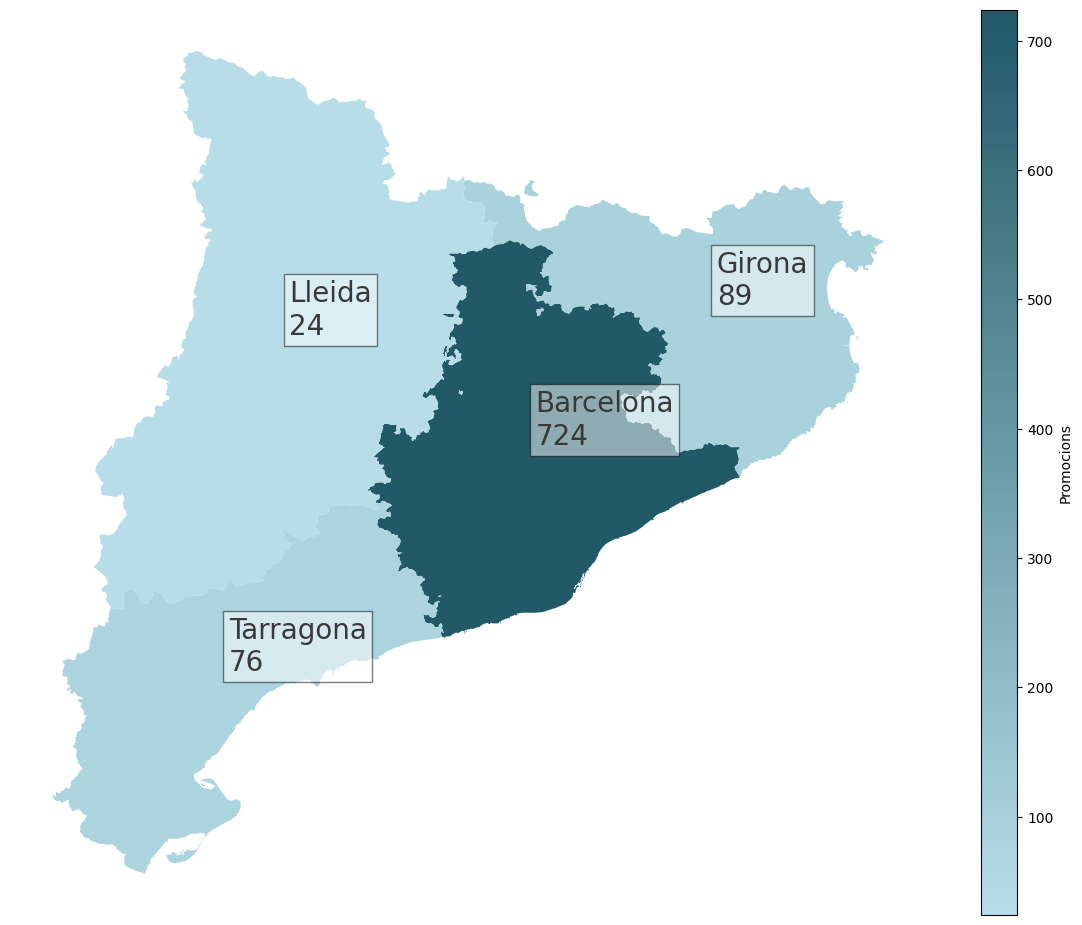

In [30]:
provprom_map = bbdd_estudi_prom[["PROVINCIA"]].value_counts().reset_index()
provprom_map.columns = ["NAME_2", "PROMOCIONS"]


shapefile_prov = gpd.read_file("C:/Users/joana.APCE/Dropbox/Dades/Scripts/Shapefiles/Provincias.geojson")
shapefile_prov = shapefile_prov[shapefile_prov["NAME_1"]=="Cataluña"]
fig, ax = plt.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
tmp = shapefile_prov.copy()
tmp = pd.merge(tmp, provprom_map, how="left", on="NAME_2")
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
cmap = colors.LinearSegmentedColormap.from_list("mi_paleta", ["#B7DEE8","#215967"]) 
tmp.plot(column='PROMOCIONS', ax=ax,cax=cax, cmap=cmap, legend=True, 
         legend_kwds={'label': "Promocions"})
# tmp.geometry.boundary.plot(color='black', ax=ax, linewidth=0.3) #Add some borders to the geometries

for i, row in tmp.iterrows():
    x, y = row['geometry'].centroid.coords[0]
    # ax.annotate(row['NAME_2'], xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=20,
    #             bbox=dict(facecolor='white', alpha=0.5))

    ax.annotate(row['NAME_2'] + f"\n{row['PROMOCIONS']}", xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=20,
                bbox=dict(facecolor='white', alpha=0.5),color="#3A3838")
                    # bbox=dict(facecolor='white', alpha=0.5),
                    # arrowprops=dict(facecolor='black', arrowstyle="->"))

ax.axis('off')
# plt.savefig(path_out + "Número de promocions per província.jpeg", bbox_inches='tight')

(2.0436134, 2.2380406, 41.30935765, 41.47581735)

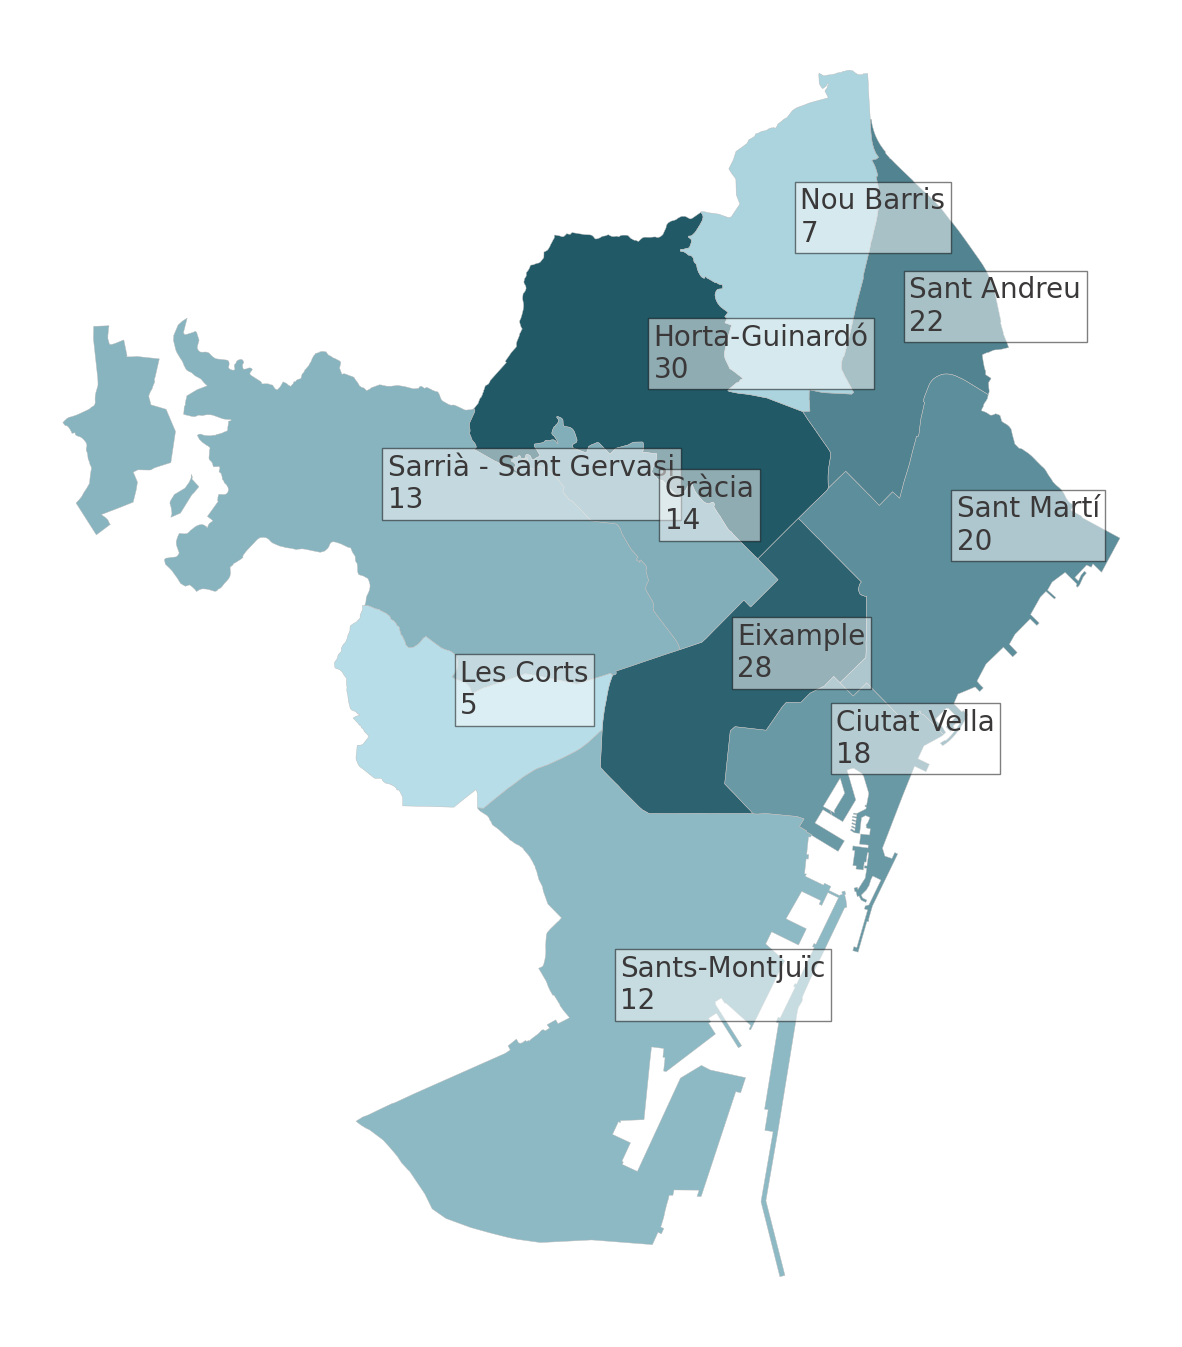

In [31]:
shapefile_disbcn = gpd.read_file("C:/Users/joana.APCE/Dropbox/Dades/Scripts/Shapefiles/shapefiles_barcelona_distrito.geojson", encoding='Latin')
shapefile_disbcn["c_distri"] = shapefile_disbcn["c_distri"].astype(float)
promdis_map = bbdd_estudi_prom[["DIST", "Nom DIST"]].value_counts().reset_index()
promdis_map["Nom DIST"] = promdis_map["Nom DIST"].str[3:]
promdis_map.columns = ["c_distri", "DIS", "PROMOCIONS"]

tmp = pd.merge(shapefile_disbcn, promdis_map, how= "left", on= "c_distri")

fig, ax = plt.subplots(1,1, figsize=(20,20))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
cmap = colors.LinearSegmentedColormap.from_list("mi_paleta", ["#B7DEE8","#215967"]) 
tmp.plot(column='PROMOCIONS', ax=ax,cax=cax, cmap=cmap, legend=True)
        #  legend_kwds={'label': "Promocions"})
tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries

for i, row in tmp.iterrows():
    x, y = row['geometry'].centroid.coords[0]
    ax.annotate(row['DIS'] + "\n" + f"{str(row['PROMOCIONS'])}", xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=20,
                bbox=dict(facecolor='white', alpha=0.5),color="#3A3838")
ax.axis('off')

# plt.savefig(path_out + "Número de promocions per districte.jpeg", bbox_inches='tight')

(0.0007591473841106755, 3.4912079300638474, 40.405957069162, 42.97842135719138)

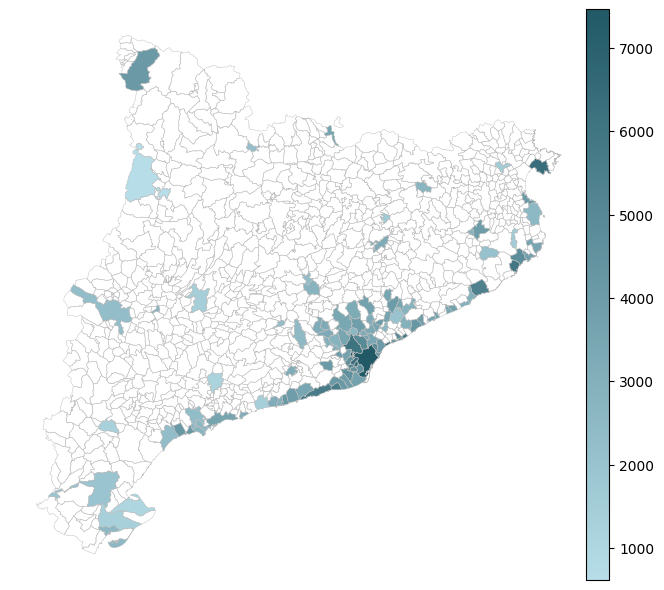

In [39]:
preummun_map = bbdd_estudi_hab[["CODIMUN","Municipi", "Preu m2 útil"]].groupby(["CODIMUN","Municipi"]).apply(np.mean)["Preu m2 útil"].reset_index()
preummun_map.columns =  ["municipi", "municipi_n", "Preu m2 útil"]
preummun_map["municipi"] = preummun_map["municipi"].astype(float)

shapefile_mun = gpd.read_file("C:/Users/joana.APCE/Dropbox/Dades/Scripts/Shapefiles/shapefile_mun.geojson")
shapefile_mun["municipi"] = shapefile_mun["municipi"].str[0:5].astype(float)
preummun_map_def = pd.merge(shapefile_mun, preummun_map, how="left", on="municipi")
tmp = preummun_map_def.copy()
# tmp["Preu m2 útil"] = round(tmp["Preu m2 útil"],2)
# tmp["Preu m2 útil"] = np.where(tmp["Preu m2 útil"].isna(), "", tmp["Preu m2 útil"])


fig, ax = plt.subplots(1,1, figsize=(9,9))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
cmap = colors.LinearSegmentedColormap.from_list("mi_paleta", ["#B7DEE8","#215967"]) 

tmp.plot(column='Preu m2 útil', ax=ax,cax=cax, cmap=cmap, legend=True) 
        #  legend_kwds={'label': "Preu m2 útil"})
tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')
# for i, row in tmp.iterrows():
#     x, y = row['geometry'].centroid.coords[0]
#     ax.annotate(f'{row["municipi_n"]}\n{(row["Preu m2 útil"])}', xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=5,
#                 bbox=dict(facecolor='white', alpha=0.5),color="#3A3838")

# plt.savefig(path_out + "Preu m2 per municipi.jpeg", bbox_inches='tight')



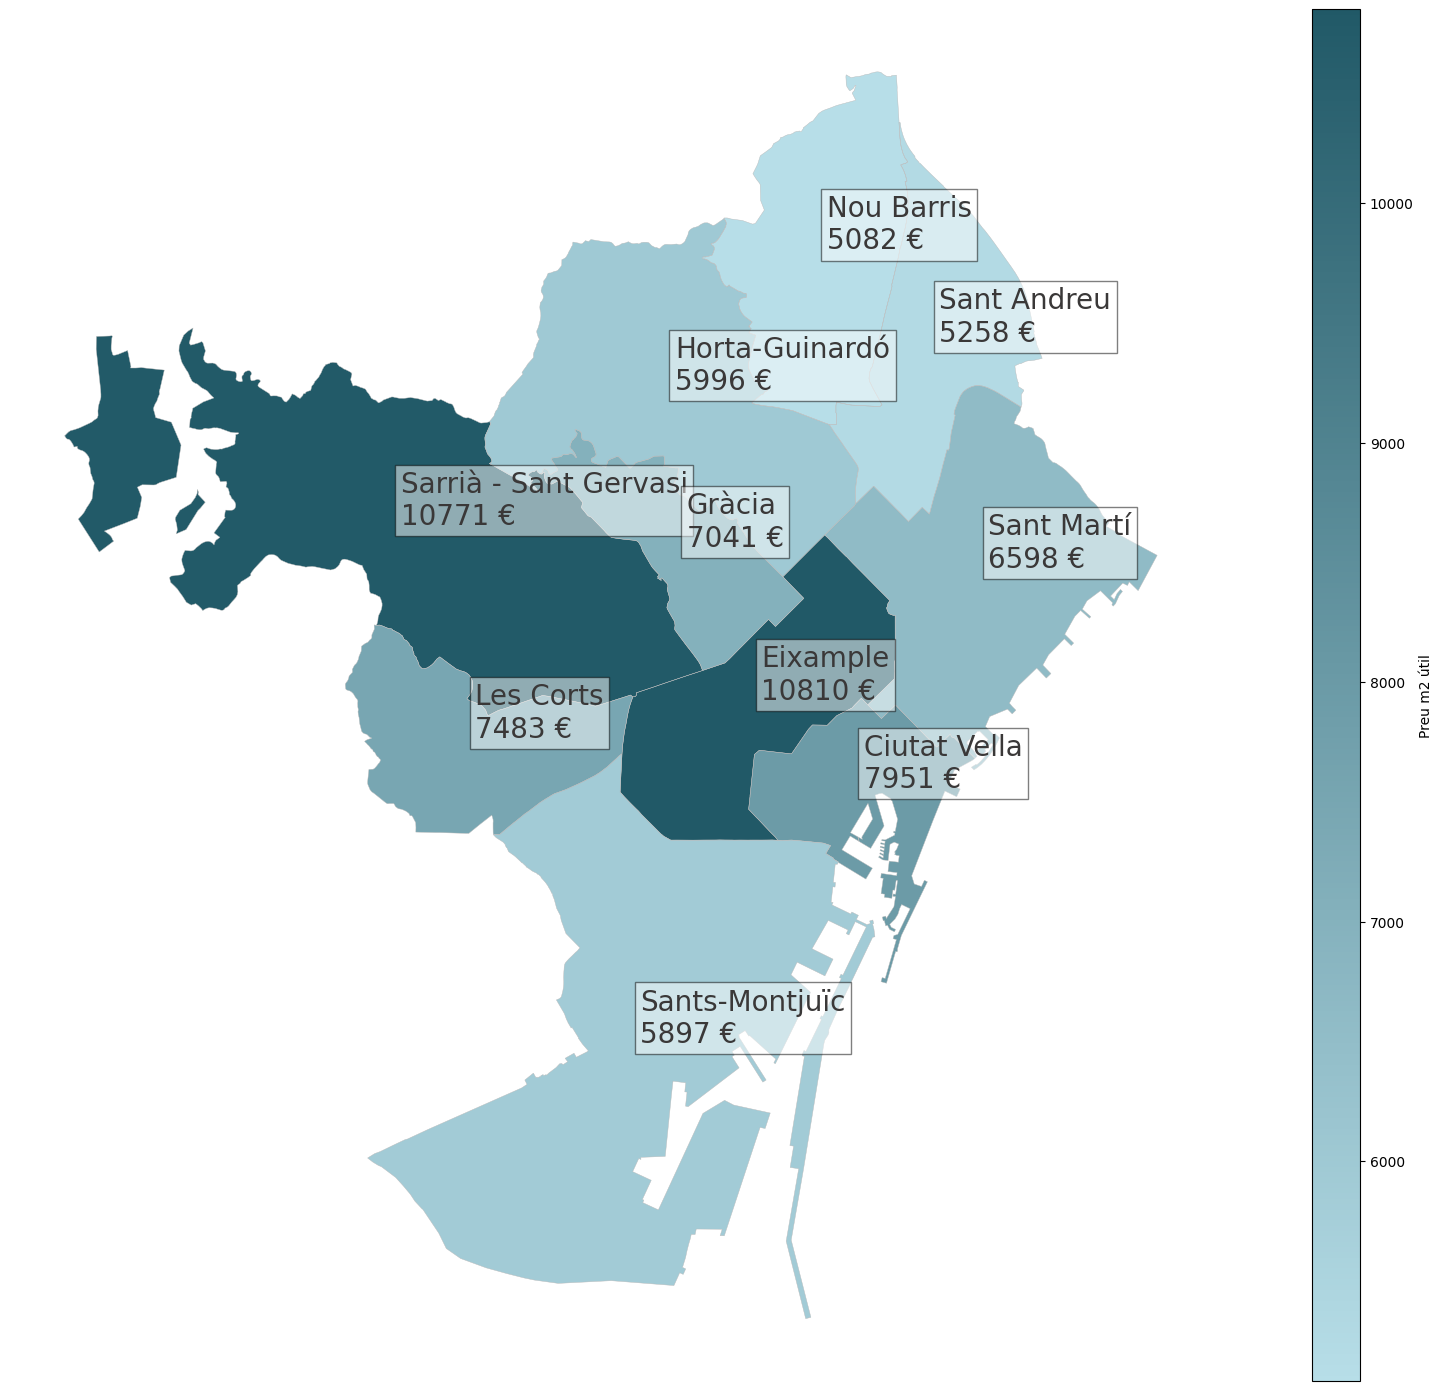

In [40]:
shapefile_disbcn = gpd.read_file("C:/Users/joana.APCE/Dropbox/Dades/Scripts/Shapefiles/shapefiles_barcelona_distrito.geojson", encoding='Latin')
shapefile_disbcn["c_distri"] = shapefile_disbcn["c_distri"].astype(float)
preudis_map = bbdd_estudi_hab[["DIST", "Nom DIST", "Preu m2 útil"]].groupby(["DIST", "Nom DIST"]).apply(np.mean)["Preu m2 útil"].reset_index()
preudis_map["Nom DIST"] = preudis_map["Nom DIST"].str[3:]
preudis_map.columns = ["c_distri", "DIS", "Preu m2 útil"]

preudis_map_def = pd.merge(shapefile_disbcn, preudis_map, how= "left", on= "c_distri")
tmp = preudis_map_def.copy()
tmp["Preu m2 útil"] = round(tmp["Preu m2 útil"],0).astype(int)
fig, ax = plt.subplots(1,1, figsize=(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
cmap = colors.LinearSegmentedColormap.from_list("mi_paleta", ["#B7DEE8","#215967"]) 
tmp.plot(column='Preu m2 útil', ax=ax,cax=cax, cmap=cmap, legend=True, 
         legend_kwds={'label': "Preu m2 útil"})
tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries

for i, row in tmp.iterrows():
    x, y = row['geometry'].centroid.coords[0]
    ax.annotate(row['DIS'] + "\n" + f"{str(row['Preu m2 útil'])}" + " €", xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=20,
                bbox=dict(facecolor='white', alpha=0.5),color="#3A3838")
ax.axis('off')

plt.savefig(path_out + "Preu m2 útil per districte.png", bbox_inches='tight')